In [11]:
#检查单细胞的TAD在哪个窗口
import collections

# 设置窗口大小
window_size = 500000
cell_file = "/home/lihaoxing/PA_IVF_532_25w_TAD/aggregateTADs/PA_strength/2-10-1.strength.txt"  # 需要检查的细胞文件

# 存储窗口信息的字典，键是 (染色体, window_start)，值是一个列表，存储TAD的 (start, end, strength)
window_tads = collections.defaultdict(list)

# 读取文件
with open(cell_file, "r") as f:
    for line in f:
        chrom, start, end, _, strength = line.strip().split()
        start, end = int(start), int(end)
        
        # 计算窗口起始位置
        window_start = (start // window_size) * window_size
        
        # 存储到窗口字典中
        window_tads[(chrom, window_start)].append((start, end, strength))

# 打印结果
for (chrom, window_start), tads in sorted(window_tads.items()):
    print(f"染色体 {chrom}, 窗口 {window_start}-{window_start + window_size}:")
    for tad in tads:
        print(f"  TAD: start={tad[0]}, end={tad[1]}, strength={tad[2]}")
    print()


染色体 1, 窗口 500000-1000000:
  TAD: start=680000, end=1400000, strength=-0.016319073895324825

染色体 1, 窗口 1000000-1500000:
  TAD: start=1400000, end=1720000, strength=1.0861198509669612

染色体 1, 窗口 1500000-2000000:
  TAD: start=1720000, end=2120000, strength=-0.48792962577254073

染色体 1, 窗口 2000000-2500000:
  TAD: start=2160000, end=2280000, strength=1.6400584016411752
  TAD: start=2320000, end=2720000, strength=4.240093577327848

染色体 1, 窗口 2500000-3000000:
  TAD: start=2720000, end=2960000, strength=6.978874079180597

染色体 1, 窗口 3000000-3500000:
  TAD: start=3000000, end=3680000, strength=3.762159030233312

染色体 1, 窗口 3500000-4000000:
  TAD: start=3760000, end=4640000, strength=0.2608745845052487

染色体 1, 窗口 4500000-5000000:
  TAD: start=4640000, end=6040000, strength=2.1486412311434853

染色体 1, 窗口 6000000-6500000:
  TAD: start=6040000, end=6640000, strength=2.167243521540875

染色体 1, 窗口 6500000-7000000:
  TAD: start=6640000, end=7520000, strength=-0.26263250469072724

染色体 1, 窗口 7500000-8000000:

  TAD: start=22160000, end=22800000, strength=0.39389295404907193

染色体 11, 窗口 22500000-23000000:
  TAD: start=22800000, end=23600000, strength=1.5974908768463891

染色体 11, 窗口 23500000-24000000:
  TAD: start=23600000, end=24680000, strength=0.28637796218024814

染色体 11, 窗口 24500000-25000000:
  TAD: start=24680000, end=24760000, strength=2.496542094568327
  TAD: start=24800000, end=25240000, strength=0.8731425133117796

染色体 11, 窗口 25000000-25500000:
  TAD: start=25240000, end=25880000, strength=5.022373305714133

染色体 11, 窗口 25500000-26000000:
  TAD: start=25880000, end=26080000, strength=-0.4864136164393933

染色体 11, 窗口 26000000-26500000:
  TAD: start=26120000, end=26440000, strength=2.0587048457777817
  TAD: start=26480000, end=27080000, strength=1.354886231046676

染色体 11, 窗口 27000000-27500000:
  TAD: start=27080000, end=27800000, strength=0.8671618238411476

染色体 11, 窗口 27500000-28000000:
  TAD: start=27800000, end=28520000, strength=1.0280067789309524

染色体 11, 窗口 28500000-29000000:
  TAD:

  TAD: start=32080000, end=33040000, strength=-1.5318205500075053

染色体 17, 窗口 33000000-33500000:
  TAD: start=33040000, end=33200000, strength=0.2849212920762406
  TAD: start=33200000, end=33720000, strength=inf

染色体 17, 窗口 33500000-34000000:
  TAD: start=33720000, end=33880000, strength=4.565202203471712
  TAD: start=33880000, end=34520000, strength=8.716078481108134

染色体 17, 窗口 34500000-35000000:
  TAD: start=34520000, end=35440000, strength=0.499995628279962

染色体 17, 窗口 35000000-35500000:
  TAD: start=35440000, end=35880000, strength=2.041390738761871

染色体 17, 窗口 35500000-36000000:
  TAD: start=35880000, end=36680000, strength=0.974440225725

染色体 17, 窗口 36500000-37000000:
  TAD: start=36680000, end=37640000, strength=2.7006122984896757

染色体 17, 窗口 37500000-38000000:
  TAD: start=37640000, end=38280000, strength=3.020289831563634

染色体 17, 窗口 38000000-38500000:
  TAD: start=38280000, end=38760000, strength=0.9929097747053434

染色体 17, 窗口 38500000-39000000:
  TAD: start=38760000, end=39

In [12]:
#批量处理 PA 500k 作为窗口大小
import os
import numpy as np

# 定义窗口大小，例如设定每个窗口的大小为500000
window_size = 500000

# 指定文件路径
directory = '/home/lihaoxing/PA_IVF_532_25w_TAD/aggregateTADs/PA_strength'

# 获取所有文件
files = [f for f in os.listdir(directory) if f.endswith('.strength.txt')]

# 存储所有细胞的TAD数据
tad_data = {}

# 读取每个文件的数据
for file in files:
    # 提取细胞ID作为列名，去掉扩展名
    cell_id = file.split('.')[0]
    tad_data[cell_id] = []

    # 构造文件的完整路径
    file_path = os.path.join(directory, file)

    # 读取文件并处理
    with open(file_path, 'r') as f:
        lines = f.readlines()
        for line in lines:
            # 解析每行数据
            parts = line.strip().split('\t')
            chr_name, start, end, _, strength = parts[0], int(parts[1]), int(parts[2]), parts[3], parts[4]

            # 如果 strength 是 'nan' 或 'inf'，则跳过
            if strength == 'nan' or strength == 'inf':
                continue

            strength = float(strength)

            # 计算该TAD所在的窗口编号
            window_start = (start // window_size) * window_size
            window_end = window_start + window_size

            # 如果该窗口已经存在，则累加到该窗口的TAD列表中
            if len(tad_data[cell_id]) == 0 or tad_data[cell_id][-1][0] != window_start or tad_data[cell_id][-1][2] != chr_name:
                tad_data[cell_id].append([chr_name, window_start, window_end, strength])
            else:
                tad_data[cell_id][-1][3] += strength

# 转化为矩阵
# 获取所有窗口的起始位置，按染色体和起始位置进行排序
windows = sorted(set((window[0], window[1], window[2]) for data in tad_data.values() for window in data))

# 创建矩阵，每列是细胞，每行是一个窗口
matrix = np.zeros((len(windows), len(files)))
window_ids = []

# 填充矩阵
for col, file in enumerate(files):
    cell_id = file.split('.')[0]  # 确保这里使用去掉扩展名的cell_id
    for row, (chr_name, window_start, window_end) in enumerate(windows):
        # 计算该窗口的平均strength
        total_strength = 0
        count = 0
        for data in tad_data[cell_id]:
            if data[0] == chr_name and data[1] == window_start and data[2] == window_end:
                total_strength += data[3]
                count += 1
        if count > 0:
            matrix[row, col] = total_strength / count
        else:
            matrix[row, col] = np.nan
        
        # 添加窗口的ID (chr_name-start-end)
        if row >= len(window_ids):
            window_ids.append(f"{chr_name}-{window_start}-{window_end}")

# 输出矩阵到文件
output_file = os.path.join(directory, 'PA_TADstrength_matrix.txt')

# 组合矩阵数据与窗口 ID
header = '\t'.join(['WindowID'] + [f.split('.')[0] for f in files])

# 使用np.savetxt写入矩阵
with open(output_file, 'w') as f:
    f.write(header + '\n')
    for i, window_id in enumerate(window_ids):
        row_data = [window_id] + list(map(str, matrix[i]))
        f.write('\t'.join(row_data) + '\n')

print(f"矩阵已保存至: {output_file}")


矩阵已保存至: /home/lihaoxing/PA_IVF_532_25w_TAD/aggregateTADs/PA_strength/PA_TADstrength_matrix.txt


In [86]:
#批量处理 PA 250k 作为窗口大小
import os
import numpy as np

# 定义窗口大小，例如设定每个窗口的大小为 250000
window_size = 250000

# 指定文件路径
directory = '/home/lihaoxing/PA_IVF_532_25w_TAD/aggregateTADs/PA_strength'

# 获取所有文件
files = [f for f in os.listdir(directory) if f.endswith('.strength.txt')]

# 存储所有细胞的TAD数据
tad_data = {}

# 读取每个文件的数据
for file in files:
    # 提取细胞ID作为列名，去掉扩展名
    cell_id = file.split('.')[0]
    tad_data[cell_id] = []

    # 构造文件的完整路径
    file_path = os.path.join(directory, file)

    # 读取文件并处理
    with open(file_path, 'r') as f:
        lines = f.readlines()
        for line in lines:
            # 解析每行数据
            parts = line.strip().split('\t')
            chr_name, start, end, _, strength = parts[0], int(parts[1]), int(parts[2]), parts[3], parts[4]

            # 如果 strength 是 'nan' 或 'inf'，则跳过
            if strength == 'nan' or strength == 'inf':
                continue

            strength = float(strength)

            # 计算该TAD所在的窗口编号
            window_start = (start // window_size) * window_size
            window_end = window_start + window_size

            # 如果该窗口已经存在，则累加到该窗口的TAD列表中
            if len(tad_data[cell_id]) == 0 or tad_data[cell_id][-1][0] != window_start or tad_data[cell_id][-1][2] != chr_name:
                tad_data[cell_id].append([chr_name, window_start, window_end, strength])
            else:
                tad_data[cell_id][-1][3] += strength

# 转化为矩阵
# 获取所有窗口的起始位置，按染色体和起始位置进行排序
windows = sorted(set((window[0], window[1], window[2]) for data in tad_data.values() for window in data))

# 创建矩阵，每列是细胞，每行是一个窗口
matrix = np.zeros((len(windows), len(files)))
window_ids = []

# 填充矩阵
for col, file in enumerate(files):
    cell_id = file.split('.')[0]  # 确保这里使用去掉扩展名的cell_id
    for row, (chr_name, window_start, window_end) in enumerate(windows):
        # 计算该窗口的平均strength
        total_strength = 0
        count = 0
        for data in tad_data[cell_id]:
            if data[0] == chr_name and data[1] == window_start and data[2] == window_end:
                total_strength += data[3]
                count += 1
        if count > 0:
            matrix[row, col] = total_strength / count
        else:
            matrix[row, col] = np.nan
        
        # 添加窗口的ID (chr_name-start-end)
        if row >= len(window_ids):
            window_ids.append(f"{chr_name}-{window_start}-{window_end}")

# 输出矩阵到文件
output_file = os.path.join(directory, 'PA_TADstrength_matrix_w250k.txt')

# 组合矩阵数据与窗口 ID
header = '\t'.join(['WindowID'] + [f.split('.')[0] for f in files])

# 使用np.savetxt写入矩阵
with open(output_file, 'w') as f:
    f.write(header + '\n')
    for i, window_id in enumerate(window_ids):
        row_data = [window_id] + list(map(str, matrix[i]))
        f.write('\t'.join(row_data) + '\n')

print(f"矩阵已保存至: {output_file}")


矩阵已保存至: /home/lihaoxing/PA_IVF_532_25w_TAD/aggregateTADs/PA_strength/PA_TADstrength_matrix_w250k.txt


In [101]:
#批量处理 PA 1m 作为窗口大小
import os
import numpy as np

# 定义窗口大小，例如设定每个窗口的大小为 1000000
window_size = 1000000

# 指定文件路径
directory = '/home/lihaoxing/PA_IVF_532_25w_TAD/aggregateTADs/PA_strength'

# 获取所有文件
files = [f for f in os.listdir(directory) if f.endswith('.strength.txt')]

# 存储所有细胞的TAD数据
tad_data = {}

# 读取每个文件的数据
for file in files:
    # 提取细胞ID作为列名，去掉扩展名
    cell_id = file.split('.')[0]
    tad_data[cell_id] = []

    # 构造文件的完整路径
    file_path = os.path.join(directory, file)

    # 读取文件并处理
    with open(file_path, 'r') as f:
        lines = f.readlines()
        for line in lines:
            # 解析每行数据
            parts = line.strip().split('\t')
            chr_name, start, end, _, strength = parts[0], int(parts[1]), int(parts[2]), parts[3], parts[4]

            # 如果 strength 是 'nan' 或 'inf'，则跳过
            if strength == 'nan' or strength == 'inf':
                continue

            strength = float(strength)

            # 计算该TAD所在的窗口编号
            window_start = (start // window_size) * window_size
            window_end = window_start + window_size

            # 如果该窗口已经存在，则累加到该窗口的TAD列表中
            if len(tad_data[cell_id]) == 0 or tad_data[cell_id][-1][0] != window_start or tad_data[cell_id][-1][2] != chr_name:
                tad_data[cell_id].append([chr_name, window_start, window_end, strength])
            else:
                tad_data[cell_id][-1][3] += strength

# 转化为矩阵
# 获取所有窗口的起始位置，按染色体和起始位置进行排序
windows = sorted(set((window[0], window[1], window[2]) for data in tad_data.values() for window in data))

# 创建矩阵，每列是细胞，每行是一个窗口
matrix = np.zeros((len(windows), len(files)))
window_ids = []

# 填充矩阵
for col, file in enumerate(files):
    cell_id = file.split('.')[0]  # 确保这里使用去掉扩展名的cell_id
    for row, (chr_name, window_start, window_end) in enumerate(windows):
        # 计算该窗口的平均strength
        total_strength = 0
        count = 0
        for data in tad_data[cell_id]:
            if data[0] == chr_name and data[1] == window_start and data[2] == window_end:
                total_strength += data[3]
                count += 1
        if count > 0:
            matrix[row, col] = total_strength / count
        else:
            matrix[row, col] = np.nan
        
        # 添加窗口的ID (chr_name-start-end)
        if row >= len(window_ids):
            window_ids.append(f"{chr_name}-{window_start}-{window_end}")

# 输出矩阵到文件
output_file = os.path.join(directory, 'PA_TADstrength_matrix_w1m.txt')

# 组合矩阵数据与窗口 ID
header = '\t'.join(['WindowID'] + [f.split('.')[0] for f in files])

# 使用np.savetxt写入矩阵
with open(output_file, 'w') as f:
    f.write(header + '\n')
    for i, window_id in enumerate(window_ids):
        row_data = [window_id] + list(map(str, matrix[i]))
        f.write('\t'.join(row_data) + '\n')

print(f"矩阵已保存至: {output_file}")


矩阵已保存至: /home/lihaoxing/PA_IVF_532_25w_TAD/aggregateTADs/PA_strength/PA_TADstrength_matrix_w1m.txt


In [102]:
#提取表达量矩阵，因为有些细胞并不在拟时序分析列表中
import pandas as pd

# 读取表达量矩阵文件
expression_matrix_file = '/home/lihaoxing/PA_IVF_532_25w_TAD/aggregateTADs/PA_strength/PA_TADstrength_matrix_w1m.txt'  # 替换成你的表达量矩阵文件名
expression_matrix = pd.read_csv(expression_matrix_file, sep='\t')

# 读取细胞ID文件
cell_ids_file = '/home/lihaoxing/PA_IVF_532_25w_TAD/aggregateTADs/PA_strength/pa_id.txt'  # 替换成你的细胞ID文件名
with open(cell_ids_file, 'r') as f:
    cell_ids = f.read().splitlines()

# 提取包含在细胞ID文件中的细胞的表达量矩阵
filtered_expression_matrix = expression_matrix[['WindowID'] + cell_ids]

# 保存提取后的表达量矩阵到新的文件
filtered_expression_matrix_file = '/home/lihaoxing/PA_IVF_532_25w_TAD/aggregateTADs/PA_strength/PA_TADstrength_matrix_w1m_new.txt'  # 输出文件名
filtered_expression_matrix.to_csv(filtered_expression_matrix_file, sep='\t', index=False)

print(f"提取后的表达量矩阵已保存到 {filtered_expression_matrix_file}")


提取后的表达量矩阵已保存到 /home/lihaoxing/PA_IVF_532_25w_TAD/aggregateTADs/PA_strength/PA_TADstrength_matrix_w1m_new.txt


In [13]:
#批量处理 IVF 500k 作为窗口大小
import os
import numpy as np

# 定义窗口大小，例如设定每个窗口的大小为500000
window_size = 500000

# 指定文件路径
directory = '/home/lihaoxing/PA_IVF_532_25w_TAD/aggregateTADs/IVF_strength'

# 获取所有文件
files = [f for f in os.listdir(directory) if f.endswith('.strength.txt')]

# 存储所有细胞的TAD数据
tad_data = {}

# 读取每个文件的数据
for file in files:
    # 提取细胞ID作为列名，去掉扩展名
    cell_id = file.split('.')[0]
    tad_data[cell_id] = []

    # 构造文件的完整路径
    file_path = os.path.join(directory, file)

    # 读取文件并处理
    with open(file_path, 'r') as f:
        lines = f.readlines()
        for line in lines:
            # 解析每行数据
            parts = line.strip().split('\t')
            chr_name, start, end, _, strength = parts[0], int(parts[1]), int(parts[2]), parts[3], parts[4]

            # 如果 strength 是 'nan' 或 'inf'，则跳过
            if strength == 'nan' or strength == 'inf':
                continue

            strength = float(strength)

            # 计算该TAD所在的窗口编号
            window_start = (start // window_size) * window_size
            window_end = window_start + window_size

            # 如果该窗口已经存在，则累加到该窗口的TAD列表中
            if len(tad_data[cell_id]) == 0 or tad_data[cell_id][-1][0] != window_start or tad_data[cell_id][-1][2] != chr_name:
                tad_data[cell_id].append([chr_name, window_start, window_end, strength])
            else:
                tad_data[cell_id][-1][3] += strength

# 转化为矩阵
# 获取所有窗口的起始位置，按染色体和起始位置进行排序
windows = sorted(set((window[0], window[1], window[2]) for data in tad_data.values() for window in data))

# 创建矩阵，每列是细胞，每行是一个窗口
matrix = np.zeros((len(windows), len(files)))
window_ids = []

# 填充矩阵
for col, file in enumerate(files):
    cell_id = file.split('.')[0]  # 确保这里使用去掉扩展名的cell_id
    for row, (chr_name, window_start, window_end) in enumerate(windows):
        # 计算该窗口的平均strength
        total_strength = 0
        count = 0
        for data in tad_data[cell_id]:
            if data[0] == chr_name and data[1] == window_start and data[2] == window_end:
                total_strength += data[3]
                count += 1
        if count > 0:
            matrix[row, col] = total_strength / count
        else:
            matrix[row, col] = np.nan
        
        # 添加窗口的ID (chr_name-start-end)
        if row >= len(window_ids):
            window_ids.append(f"{chr_name}-{window_start}-{window_end}")

# 输出矩阵到文件
output_file = os.path.join(directory, 'IVF_TADstrength_matrix.txt')

# 组合矩阵数据与窗口 ID
header = '\t'.join(['WindowID'] + [f.split('.')[0] for f in files])

# 使用np.savetxt写入矩阵
with open(output_file, 'w') as f:
    f.write(header + '\n')
    for i, window_id in enumerate(window_ids):
        row_data = [window_id] + list(map(str, matrix[i]))
        f.write('\t'.join(row_data) + '\n')

print(f"矩阵已保存至: {output_file}")


矩阵已保存至: /home/lihaoxing/PA_IVF_532_25w_TAD/aggregateTADs/IVF_strength/IVF_TADstrength_matrix.txt


In [87]:
#批量处理 IVF 250k 作为窗口大小
import os
import numpy as np

# 定义窗口大小，例如设定每个窗口的大小为250000
window_size = 250000

# 指定文件路径
directory = '/home/lihaoxing/PA_IVF_532_25w_TAD/aggregateTADs/IVF_strength'

# 获取所有文件
files = [f for f in os.listdir(directory) if f.endswith('.strength.txt')]

# 存储所有细胞的TAD数据
tad_data = {}

# 读取每个文件的数据
for file in files:
    # 提取细胞ID作为列名，去掉扩展名
    cell_id = file.split('.')[0]
    tad_data[cell_id] = []

    # 构造文件的完整路径
    file_path = os.path.join(directory, file)

    # 读取文件并处理
    with open(file_path, 'r') as f:
        lines = f.readlines()
        for line in lines:
            # 解析每行数据
            parts = line.strip().split('\t')
            chr_name, start, end, _, strength = parts[0], int(parts[1]), int(parts[2]), parts[3], parts[4]

            # 如果 strength 是 'nan' 或 'inf'，则跳过
            if strength == 'nan' or strength == 'inf':
                continue

            strength = float(strength)

            # 计算该TAD所在的窗口编号
            window_start = (start // window_size) * window_size
            window_end = window_start + window_size

            # 如果该窗口已经存在，则累加到该窗口的TAD列表中
            if len(tad_data[cell_id]) == 0 or tad_data[cell_id][-1][0] != window_start or tad_data[cell_id][-1][2] != chr_name:
                tad_data[cell_id].append([chr_name, window_start, window_end, strength])
            else:
                tad_data[cell_id][-1][3] += strength

# 转化为矩阵
# 获取所有窗口的起始位置，按染色体和起始位置进行排序
windows = sorted(set((window[0], window[1], window[2]) for data in tad_data.values() for window in data))

# 创建矩阵，每列是细胞，每行是一个窗口
matrix = np.zeros((len(windows), len(files)))
window_ids = []

# 填充矩阵
for col, file in enumerate(files):
    cell_id = file.split('.')[0]  # 确保这里使用去掉扩展名的cell_id
    for row, (chr_name, window_start, window_end) in enumerate(windows):
        # 计算该窗口的平均strength
        total_strength = 0
        count = 0
        for data in tad_data[cell_id]:
            if data[0] == chr_name and data[1] == window_start and data[2] == window_end:
                total_strength += data[3]
                count += 1
        if count > 0:
            matrix[row, col] = total_strength / count
        else:
            matrix[row, col] = np.nan
        
        # 添加窗口的ID (chr_name-start-end)
        if row >= len(window_ids):
            window_ids.append(f"{chr_name}-{window_start}-{window_end}")

# 输出矩阵到文件
output_file = os.path.join(directory, 'IVF_TADstrength_matrix_w250k.txt')

# 组合矩阵数据与窗口 ID
header = '\t'.join(['WindowID'] + [f.split('.')[0] for f in files])

# 使用np.savetxt写入矩阵
with open(output_file, 'w') as f:
    f.write(header + '\n')
    for i, window_id in enumerate(window_ids):
        row_data = [window_id] + list(map(str, matrix[i]))
        f.write('\t'.join(row_data) + '\n')

print(f"矩阵已保存至: {output_file}")


矩阵已保存至: /home/lihaoxing/PA_IVF_532_25w_TAD/aggregateTADs/IVF_strength/IVF_TADstrength_matrix_w250k.txt


In [103]:
#批量处理 IVF 1m 作为窗口大小
import os
import numpy as np

# 定义窗口大小，例如设定每个窗口的大小为 1000000
window_size = 1000000

# 指定文件路径
directory = '/home/lihaoxing/PA_IVF_532_25w_TAD/aggregateTADs/IVF_strength'

# 获取所有文件
files = [f for f in os.listdir(directory) if f.endswith('.strength.txt')]

# 存储所有细胞的TAD数据
tad_data = {}

# 读取每个文件的数据
for file in files:
    # 提取细胞ID作为列名，去掉扩展名
    cell_id = file.split('.')[0]
    tad_data[cell_id] = []

    # 构造文件的完整路径
    file_path = os.path.join(directory, file)

    # 读取文件并处理
    with open(file_path, 'r') as f:
        lines = f.readlines()
        for line in lines:
            # 解析每行数据
            parts = line.strip().split('\t')
            chr_name, start, end, _, strength = parts[0], int(parts[1]), int(parts[2]), parts[3], parts[4]

            # 如果 strength 是 'nan' 或 'inf'，则跳过
            if strength == 'nan' or strength == 'inf':
                continue

            strength = float(strength)

            # 计算该TAD所在的窗口编号
            window_start = (start // window_size) * window_size
            window_end = window_start + window_size

            # 如果该窗口已经存在，则累加到该窗口的TAD列表中
            if len(tad_data[cell_id]) == 0 or tad_data[cell_id][-1][0] != window_start or tad_data[cell_id][-1][2] != chr_name:
                tad_data[cell_id].append([chr_name, window_start, window_end, strength])
            else:
                tad_data[cell_id][-1][3] += strength

# 转化为矩阵
# 获取所有窗口的起始位置，按染色体和起始位置进行排序
windows = sorted(set((window[0], window[1], window[2]) for data in tad_data.values() for window in data))

# 创建矩阵，每列是细胞，每行是一个窗口
matrix = np.zeros((len(windows), len(files)))
window_ids = []

# 填充矩阵
for col, file in enumerate(files):
    cell_id = file.split('.')[0]  # 确保这里使用去掉扩展名的cell_id
    for row, (chr_name, window_start, window_end) in enumerate(windows):
        # 计算该窗口的平均strength
        total_strength = 0
        count = 0
        for data in tad_data[cell_id]:
            if data[0] == chr_name and data[1] == window_start and data[2] == window_end:
                total_strength += data[3]
                count += 1
        if count > 0:
            matrix[row, col] = total_strength / count
        else:
            matrix[row, col] = np.nan
        
        # 添加窗口的ID (chr_name-start-end)
        if row >= len(window_ids):
            window_ids.append(f"{chr_name}-{window_start}-{window_end}")

# 输出矩阵到文件
output_file = os.path.join(directory, 'IVF_TADstrength_matrix_w1m.txt')

# 组合矩阵数据与窗口 ID
header = '\t'.join(['WindowID'] + [f.split('.')[0] for f in files])

# 使用np.savetxt写入矩阵
with open(output_file, 'w') as f:
    f.write(header + '\n')
    for i, window_id in enumerate(window_ids):
        row_data = [window_id] + list(map(str, matrix[i]))
        f.write('\t'.join(row_data) + '\n')

print(f"矩阵已保存至: {output_file}")


矩阵已保存至: /home/lihaoxing/PA_IVF_532_25w_TAD/aggregateTADs/IVF_strength/IVF_TADstrength_matrix_w1m.txt


In [104]:
#ivf 250k
import pandas as pd

# 读取表达量矩阵文件
expression_matrix_file = '/home/lihaoxing/PA_IVF_532_25w_TAD/aggregateTADs/IVF_strength/IVF_TADstrength_matrix_w1m.txt'  # 替换成你的表达量矩阵文件名
expression_matrix = pd.read_csv(expression_matrix_file, sep='\t')

# 读取细胞ID文件
cell_ids_file = '/home/lihaoxing/PA_IVF_532_25w_TAD/aggregateTADs/IVF_strength/ivf_id.txt'  # 替换成你的细胞ID文件名
with open(cell_ids_file, 'r') as f:
    cell_ids = f.read().splitlines()

# 提取包含在细胞ID文件中的细胞的表达量矩阵
filtered_expression_matrix = expression_matrix[['WindowID'] + cell_ids]

# 保存提取后的表达量矩阵到新的文件
filtered_expression_matrix_file = '/home/lihaoxing/PA_IVF_532_25w_TAD/aggregateTADs/IVF_strength/IVF_TADstrength_matrix_w1m_new.txt'  # 输出文件名
filtered_expression_matrix.to_csv(filtered_expression_matrix_file, sep='\t', index=False)

print(f"提取后的表达量矩阵已保存到 {filtered_expression_matrix_file}")


提取后的表达量矩阵已保存到 /home/lihaoxing/PA_IVF_532_25w_TAD/aggregateTADs/IVF_strength/IVF_TADstrength_matrix_w1m_new.txt


In [105]:
!cp /home/lihaoxing/PA_IVF_532_25w_TAD/aggregateTADs/IVF_strength/IVF_TADstrength_matrix_w1m_new.txt /home/lihaoxing/PA_IVF_532_25w_TAD/aggregateTADs/TADstrength_vs_Time/
!cp /home/lihaoxing/PA_IVF_532_25w_TAD/aggregateTADs/PA_strength/PA_TADstrength_matrix_w1m_new.txt /home/lihaoxing/PA_IVF_532_25w_TAD/aggregateTADs/TADstrength_vs_Time/

In [147]:
#IVF
import pandas as pd
import numpy as np
from scipy.stats import pearsonr, spearmanr

# 读取数据
tad_strength = pd.read_csv("/home/lihaoxing/PA_IVF_532_25w_TAD/aggregateTADs/TADstrength_vs_Time/IVF_TADstrength_matrix_w1m_new.txt", sep="\t", index_col=0)
time_data = pd.read_csv("/home/lihaoxing/PA_IVF_532_25w_TAD/aggregateTADs/TADstrength_vs_Time/ivf_time.txt", sep="\t")

# 构建时间字典
time_dict = dict(zip(time_data['id'], time_data['time']))

# 存储相关性结果
correlation_results = []
correlation_results_not_significant = []
for window_id, row in tad_strength.iterrows():
    # 筛选出有数值的细胞
    valid_cells = row.dropna().index
    
    # 如果该窗口有有效的细胞ID
    if len(valid_cells) > 0:
        # 找到有效细胞的时间值
        times = pd.Series(time_dict).loc[valid_cells].dropna()  # 确保时间数据有效
        
        # 如果至少有两个有效的细胞及其对应的时间
        if len(times) > 1:
            # 提取对应的窗口强度值
            values = row[valid_cells].loc[times.index].astype(float)  # 保证对应细胞的强度值和时间值
            
            # 确保数据中没有NaN或inf
            values = values.replace([np.inf, -np.inf], np.nan).dropna()
            times = times.replace([np.inf, -np.inf], np.nan).dropna()
            
            # 重新检查数据是否有效
            if len(values) > 1 and len(values) == len(times):
                num_valid_cells = len(values)  # 记录有效细胞数量
                
                # 计算皮尔逊和斯皮尔曼相关性
                pearson_corr, pearson_p = pearsonr(values, times)
                spearman_corr, spearman_p = spearmanr(values, times)
                
                # 仅存储 p 值显著的结果（p < 0.05）
                if pearson_p < 0.05:
                    correlation_results.append([window_id, num_valid_cells, pearson_corr, pearson_p, spearman_corr, spearman_p])
                else:
                    correlation_results_not_significant.append([window_id, num_valid_cells, pearson_corr, pearson_p, spearman_corr, spearman_p])

# 转换为 DataFrame 并按 Pearson 相关性排序
correlation_df = pd.DataFrame(correlation_results, columns=['WindowID', 'Valid_Cell_Count', 'Pearson_corr', 'Pearson_p', 'Spearman_corr', 'Spearman_p'])
correlation_df = correlation_df.sort_values(by='Pearson_corr', ascending=False)

# 输出显著性结果
print(correlation_df)
correlation_df.to_csv("/home/lihaoxing/PA_IVF_532_25w_TAD/aggregateTADs/TADstrength_vs_Time/IVF_correlation_results_significant_w1m.txt", sep="\t", index=False)

# 转换为 DataFrame 并按 Pearson 相关性排序
not_correlation_df = pd.DataFrame(correlation_results_not_significant, columns=['WindowID', 'Valid_Cell_Count', 'Pearson_corr', 'Pearson_p', 'Spearman_corr', 'Spearman_p'])
not_correlation_df = not_correlation_df.sort_values(by='Pearson_corr', ascending=False)
not_correlation_df.to_csv("/home/lihaoxing/PA_IVF_532_25w_TAD/aggregateTADs/TADstrength_vs_Time/IVF_correlation_results_not_significant_w1m.txt", sep="\t", index=False)


                  WindowID  Valid_Cell_Count  Pearson_corr  Pearson_p  \
126   17-61000000-62000000                74      0.347483   0.002418   
30   1-154000000-155000000               139      0.308660   0.000218   
34   1-175000000-176000000               170      0.223277   0.003425   
191    6-20000000-21000000               171      0.202190   0.008001   
181  4-122000000-123000000               174      0.193591   0.010482   
..                     ...               ...           ...        ...   
128     18-2000000-3000000                45     -0.311424   0.037306   
1      1-15000000-16000000               162     -0.319272   0.000035   
28   1-147000000-148000000               161     -0.322849   0.000030   
27   1-146000000-147000000               149     -0.325638   0.000051   
194    6-70000000-71000000               163     -0.327459   0.000020   

     Spearman_corr  Spearman_p  
126       0.035587    0.763405  
30        0.305134    0.000260  
34        0.190664    0.

In [114]:
#PA
import pandas as pd
import numpy as np
from scipy.stats import pearsonr, spearmanr

# 读取数据
tad_strength = pd.read_csv("/home/lihaoxing/PA_IVF_532_25w_TAD/aggregateTADs/TADstrength_vs_Time/PA_TADstrength_matrix_w1m_new.txt", sep="\t", index_col=0)
time_data = pd.read_csv("/home/lihaoxing/PA_IVF_532_25w_TAD/aggregateTADs/TADstrength_vs_Time/pa_time.txt", sep="\t")

# 构建时间字典
time_dict = dict(zip(time_data['id'], time_data['time']))

# 存储相关性结果
correlation_results = []
correlation_results_not_significant = []
for window_id, row in tad_strength.iterrows():
    # 筛选出有数值的细胞
    valid_cells = row.dropna().index
    
    # 如果该窗口有有效的细胞ID
    if len(valid_cells) > 0:
        # 找到有效细胞的时间值
        times = pd.Series(time_dict).loc[valid_cells].dropna()  # 确保时间数据有效
        
        # 如果至少有两个有效的细胞及其对应的时间
        if len(times) > 1:
            # 提取对应的窗口强度值
            values = row[valid_cells].loc[times.index].astype(float)  # 保证对应细胞的强度值和时间值
            
            # 确保数据中没有NaN或inf
            values = values.replace([np.inf, -np.inf], np.nan).dropna()
            times = times.replace([np.inf, -np.inf], np.nan).dropna()
            
            # 重新检查数据是否有效
            if len(values) > 1 and len(values) == len(times):
                num_valid_cells = len(values)  # 记录有效细胞数量
                
                # 计算皮尔逊和斯皮尔曼相关性
                pearson_corr, pearson_p = pearsonr(values, times)
                spearman_corr, spearman_p = spearmanr(values, times)
                
                # 仅存储 p 值显著的结果（p < 0.05）
                if pearson_p < 0.05:
                    correlation_results.append([window_id, num_valid_cells, pearson_corr, pearson_p, spearman_corr, spearman_p])
                else:
                    correlation_results_not_significant.append([window_id, num_valid_cells, pearson_corr, pearson_p, spearman_corr, spearman_p])

# 转换为 DataFrame 并按 Pearson 相关性排序
correlation_df = pd.DataFrame(correlation_results, columns=['WindowID', 'Valid_Cell_Count', 'Pearson_corr', 'Pearson_p', 'Spearman_corr', 'Spearman_p'])
correlation_df = correlation_df.sort_values(by='Pearson_corr', ascending=False)

# 输出显著性结果
print(correlation_df)
correlation_df.to_csv("/home/lihaoxing/PA_IVF_532_25w_TAD/aggregateTADs/TADstrength_vs_Time/PA_correlation_results_significant_w1m.txt", sep="\t", index=False)


                 WindowID  Valid_Cell_Count  Pearson_corr  Pearson_p  \
13    4-76000000-77000000               150      0.190095   0.019806   
6    13-31000000-32000000               141     -0.169951   0.043928   
11    3-64000000-65000000               124     -0.177856   0.048126   
4   1-203000000-204000000               127     -0.184473   0.037875   
15    5-28000000-29000000               129     -0.186781   0.034051   
5   1-249000000-250000000               111     -0.191003   0.044634   
12    3-69000000-70000000               136     -0.199470   0.019903   
9      18-2000000-3000000               114     -0.203094   0.030220   
16      7-6000000-7000000               120     -0.222904   0.014401   
3   1-166000000-167000000               131     -0.223518   0.010278   
2   1-159000000-160000000               120     -0.227447   0.012479   
14    4-92000000-93000000               134     -0.232071   0.006972   
8     14-9000000-10000000               116     -0.238023   0.01

In [59]:
cd /home/lihaoxing/PA_IVF_532_25w_TAD/aggregateTADs/TADstrength_vs_Time

/home/lihaoxing/PA_IVF_532_25w_TAD/aggregateTADs/TADstrength_vs_Time


选择了 Mann-Whitney U 检验。
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

positive vs. negative: Mann-Whitney-Wilcoxon test two-sided, P_val:9.511e-02 U_stat=2.108e+03


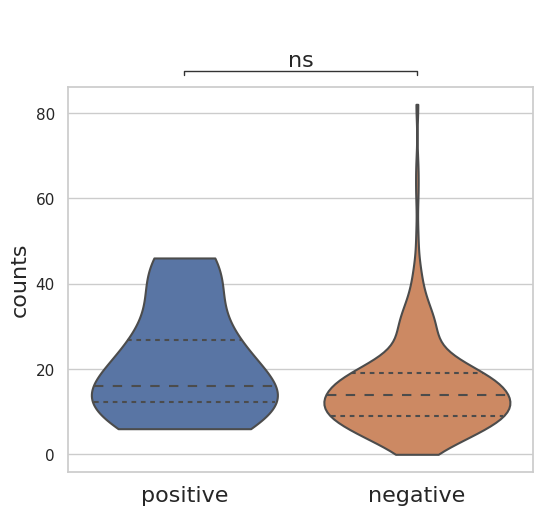

In [146]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from statannotations.Annotator import Annotator


# 读取数据
data = pd.read_csv("/home/lihaoxing/PA_IVF_532_25w_TAD/aggregateTADs/TADstrength_vs_Time/pos_vs_neg_gene_density.txt", sep="\t")  

# 画图
plt.figure(figsize=(6, 5))
ax = sns.violinplot(x="type", y="counts", data=data, inner="quart", cut=0, scale="width")

# 进行统计检验（t 检验）
white_values = data[data["type"] == "positive"]["counts"]
beige_values = data[data["type"] == "negative"]["counts"]

chosen_test = 'Mann-Whitney'
# 对数据进行检验
pairs = [('positive', 'negative')]
annotator = Annotator(ax, pairs, data=data, x="type", y="counts", order=['positive', 'negative'])

if chosen_test == 't-test_ind':
    annotator.configure(test='t-test_ind', text_format='star', line_height=0.01, line_width=1, loc='outside',fontsize=16)
    print("选择了 t-检验 (独立样本 t 检验)。")
elif chosen_test == 't-test_welch':
    annotator.configure(test='t-test_welch', text_format='star', line_height=0.01, line_width=1, loc='outside',fontsize=16)
    print("选择了 Welch's t-检验。")
else:
    annotator.configure(test='Mann-Whitney', text_format='star', line_height=0.01, line_width=1, loc='outside',fontsize=16)
    print("选择了 Mann-Whitney U 检验。")

annotator.apply_and_annotate()

# 添加标题
plt.title(" ",fontsize=20,pad=40)
plt.ylabel('counts',fontsize=16)
plt.xlabel('')
plt.xticks(ticks=[0, 1], labels=["positive", "negative"], fontsize=16)
#plt.legend(title="Cell Type", fontsize=12)
plt.show()

选择了 Mann-Whitney U 检验。
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

positive vs. ns: Mann-Whitney-Wilcoxon test two-sided, P_val:2.292e-02 U_stat=1.060e+04


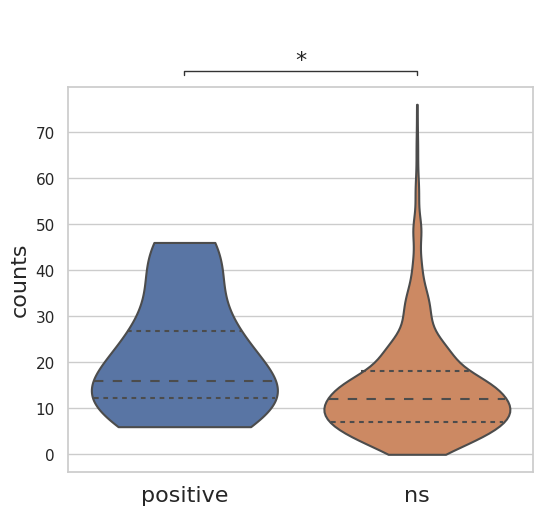

In [149]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from statannotations.Annotator import Annotator


# 读取数据
data = pd.read_csv("/home/lihaoxing/PA_IVF_532_25w_TAD/aggregateTADs/TADstrength_vs_Time/pos_vs_ns_gene_density.txt", sep="\t")  

# 画图
plt.figure(figsize=(6, 5))
ax = sns.violinplot(x="type", y="counts", data=data, inner="quart", cut=0, scale="width")

# 进行统计检验（t 检验）
white_values = data[data["type"] == "positive"]["counts"]
beige_values = data[data["type"] == "ns"]["counts"]

chosen_test = 'Mann-Whitney'
# 对数据进行检验
pairs = [('positive', 'ns')]
annotator = Annotator(ax, pairs, data=data, x="type", y="counts", order=['positive', 'ns'])

if chosen_test == 't-test_ind':
    annotator.configure(test='t-test_ind', text_format='star', line_height=0.01, line_width=1, loc='outside',fontsize=16)
    print("选择了 t-检验 (独立样本 t 检验)。")
elif chosen_test == 't-test_welch':
    annotator.configure(test='t-test_welch', text_format='star', line_height=0.01, line_width=1, loc='outside',fontsize=16)
    print("选择了 Welch's t-检验。")
else:
    annotator.configure(test='Mann-Whitney', text_format='star', line_height=0.01, line_width=1, loc='outside',fontsize=16)
    print("选择了 Mann-Whitney U 检验。")

annotator.apply_and_annotate()

# 添加标题
plt.title(" ",fontsize=20,pad=40)
plt.ylabel('counts',fontsize=16)
plt.xlabel('')
plt.xticks(ticks=[0, 1], labels=["positive", "ns"], fontsize=16)
#plt.legend(title="Cell Type", fontsize=12)
plt.show()

In [ ]:
import os
import pandas as pd

# 读取基因区间信息
gene_df = pd.read_csv("/home/lihaoxing/Sus_scrofa.Sscrofa11.1.110/pig_promoter.bed", sep="\t", header=None, names=["chr", "start", "end", "gene_id"])

# 指定TAD文件路径
directory = "/home/lihaoxing/PA_IVF_532_25w_TAD/aggregateTADs/PA_strength"
strength_files = [f for f in os.listdir(directory) if f.endswith('.strength.txt')]

# 初始化存储字典
gene_tad_data = {}

for file in strength_files:
    cell_name = file.replace(".strength.txt", "")
    
    # 读取TAD strength 文件
    tad_df = pd.read_csv(os.path.join(directory, file), sep="\t", header=None, names=["chr", "start", "end", "id", "strength"], na_values="nan")
    
    # 为当前细胞初始化TAD值列表
    gene_values = []

    for _, gene in gene_df.iterrows():
        tad = tad_df[(tad_df["chr"] == gene["chr"]) & (tad_df["start"] <= gene["start"]) & (tad_df["end"] >= gene["end"])]
        gene_values.append(tad.iloc[0]["strength"] if not tad.empty else None)
    
    # 存入字典
    gene_tad_data[cell_name] = gene_values

# 创建DataFrame，一次性插入所有细胞数据
gene_tad_matrix = pd.DataFrame(gene_tad_data, index=gene_df["gene_id"])

# 保存结果
output_path = "/home/lihaoxing/PA_IVF_532_25w_TAD/aggregateTADs/PA_strength/gene_tad_matrix.txt"
gene_tad_matrix.to_csv(output_path, sep="\t")

print(f"文件已保存至: {output_path}")


In [27]:
#major ZGA 和DPA 基因 在 正相关区域 富集情况
#IVF
import matplotlib.pyplot as plt
from scipy.stats import fisher_exact

def read_gene_list(file_path):
    gene_list = []
    with open(file_path, 'r') as file:
        for line in file:
            gene_id = line.strip().split('\t')[0]  # 获取每行的第一个字段（基因ID）
            gene_list.append(gene_id)
    return gene_list

def enrichment_analysis(diff_genes, target_genes, non_target_genes):
    overlap_diff_target = len(set(diff_genes) & set(target_genes))
    diff_not_in_target = len(diff_genes) - overlap_diff_target
    non_target_genes_not_in_diff = len(set(target_genes) - set(diff_genes))
    non_target_diff_not_in_genes = len(set(non_target_genes) - set(diff_genes))
    
    contingency_table = [
        [overlap_diff_target, diff_not_in_target],
        [non_target_genes_not_in_diff, non_target_diff_not_in_genes]
    ]
    print(contingency_table)
    oddsratio, p_value = fisher_exact(contingency_table)
    
    return p_value

def calculate_overlap_proportion(diff_genes, background_genes):
    overlap = len(set(diff_genes) & set(background_genes))
    num_background_genes = len(background_genes)
    overlap_proportion = overlap / num_background_genes
    
    return overlap_proportion

# 从文件中读取基因列表
ZGA_genes = read_gene_list('/home/lihaoxing/PA_IVF_532_25w_TAD/aggregateTADs/TADstrength_vs_Time/IVF_majorZGAid.txt')
target_genes = read_gene_list('/home/lihaoxing/TADstrength_vs_Time/meme/IVF_cluster_0_genes.new.txt')
non_target_genes = read_gene_list('/home/lihaoxing/TADstrength_vs_Time/meme/IVF_cluster_0_genes.non.txt')

# 从文件中读取基因列表
DPA_genes = read_gene_list('/home/lihaoxing/PA_IVF_532_25w_TAD/aggregateTADs/TADstrength_vs_Time/IVF_118_gene_cors_pos_2000.txt')

# 运行富集分析
ZGA_p_value = enrichment_analysis(ZGA_genes, target_genes, non_target_genes)
#print("p-value for target genes:", p_value)

# 运行富集分析
DPA_p_value = enrichment_analysis(DPA_genes, target_genes, non_target_genes)
#print("p-value for target genes:", p_value)

# 计算重叠比例
ZGA_target_overlap_proportion = calculate_overlap_proportion(ZGA_genes, target_genes)
ZGA_non_target_overlap_proportion = calculate_overlap_proportion(ZGA_genes, non_target_genes)

# 计算重叠比例
DPA_target_overlap_proportion = calculate_overlap_proportion(DPA_genes, target_genes)
DPA_non_target_overlap_proportion = calculate_overlap_proportion(DPA_genes, non_target_genes)

# 创建柱状图
overlap_proportions = [ZGA_target_overlap_proportion, ZGA_non_target_overlap_proportion,
                       DPA_target_overlap_proportion, DPA_non_target_overlap_proportion]

print(overlap_proportions)


[[890, 2442], [3568, 13388]]
[[559, 1441], [3899, 14389]]
[0.19964109466128308, 0.15426405559065065, 0.12539255271422162, 0.09102969046114971]


阈值 ZGA:
  Fisher 精确检验: p-value = 0.000000, OR = 1.368
  卡方检验: p-value = 0.000000
  OR 置信区间: (0.25235823209111125, 0.2823918394699419)
  FDR 校正后 p-value = 0.000000
--------------------------------------------------
阈值 DPA:
  Fisher 精确检验: p-value = 0.000000, OR = 1.432
  卡方检验: p-value = 0.000000
  OR 置信区间: (0.26026989271326295, 0.2995755251377695)
  FDR 校正后 p-value = 0.000000
--------------------------------------------------


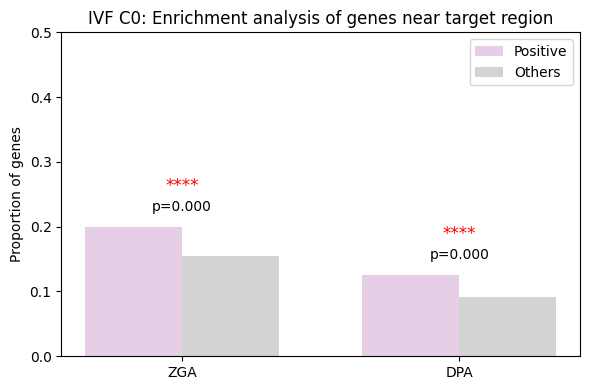

In [28]:
#major ZGA 和DPA 基因 在 正相关区域 富集情况
#IVF 1M
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import fisher_exact, chi2_contingency
import statsmodels.api as sm
from statsmodels.stats.multitest import multipletests
from IPython.display import SVG, display

plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['svg.fonttype'] = 'none'
plt.rcParams['svg.hashsalt'] = 'hello'

# 构造x轴刻度标签、数据
labels = ['ZGA', 'DPA']
first = [ZGA_target_overlap_proportion, DPA_target_overlap_proportion]  # 目标区域基因比例
second = [ZGA_non_target_overlap_proportion, DPA_non_target_overlap_proportion]  # 非目标区域基因比例

# 三个列联表
contingency_tables = [
    [[890, 2442], [3568, 13388]],
    [[559, 1441], [3899, 14389]]
]

# 计算 Fisher 精确检验 p 值、优势比（OR）
p_values = []
odds_ratios = []
for table in contingency_tables:
    or_value, p_value = fisher_exact(table)
    odds_ratios.append(or_value)
    p_values.append(p_value)

# 计算卡方检验 p 值
chi2_p_values = []
for table in contingency_tables:
    chi2, p_chi, _, _ = chi2_contingency(table)
    chi2_p_values.append(p_chi)

# 计算 95% 置信区间
confidence_intervals = []
for table in contingency_tables:
    ci = sm.stats.proportion_confint(table[0][0], sum(table[0]), method="wilson")
    confidence_intervals.append(ci)

# FDR 多重检验校正
corrected_p_values = multipletests(p_values, method='fdr_bh')[1]

# 输出检验结果
for i, (p, chi_p, or_value, ci, fdr_p) in enumerate(zip(p_values, chi2_p_values, odds_ratios, confidence_intervals, corrected_p_values)):
    print(f"阈值 {labels[i]}:")
    print(f"  Fisher 精确检验: p-value = {p:.6f}, OR = {or_value:.3f}")
    print(f"  卡方检验: p-value = {chi_p:.6f}")
    print(f"  OR 置信区间: {ci}")
    print(f"  FDR 校正后 p-value = {fdr_p:.6f}")
    print("-" * 50)

# 绘图
plt.figure(figsize=(6, 4))
x = np.arange(len(labels))  # x轴刻度标签位置
width = 0.35  # 柱子宽度

bars1 = plt.bar(x - width/2, first, width, label='Positive', color='#e6cfe6')
bars2 = plt.bar(x + width/2, second, width, label='Others', color='lightgrey')

plt.ylabel('Proportion of genes')
plt.title('IVF C0: Enrichment analysis of genes near target region')
plt.xticks(x, labels)
plt.ylim(0, 0.5)

# 在柱子上标注 p 值，并根据显著性水平加星号
for i, p_value in enumerate(p_values):
    plt.text(i, max(first[i], second[i]) + 0.02, f'p={p_value:.3f}', ha='center', va='bottom', fontsize=10)
    
    # 标注显著性星号
    if first[i] > second[i] and p_value <= 0.05:
        if p_value <= 1.00e-04:
            plt.text(i, max(first[i], second[i]) + 0.05, '****', ha='center', va='bottom', fontsize=12, color='red')
        elif p_value <= 1.00e-03:
            plt.text(i, max(first[i], second[i]) + 0.05, '***', ha='center', va='bottom', fontsize=12, color='red')
        elif p_value <= 1.00e-02:
            plt.text(i, max(first[i], second[i]) + 0.05, '**', ha='center', va='bottom', fontsize=12, color='red')
        elif p_value <= 5.00e-02:
            plt.text(i, max(first[i], second[i]) + 0.05, '*', ha='center', va='bottom', fontsize=12, color='red')

plt.legend()
plt.tight_layout()
# 保存图像为 PDF
plt.savefig('IVF_TADstrength_vs_Pseudotime_C0_enrich.svg', dpi=300, bbox_inches='tight', transparent=True)


In [4]:
#major ZGA 和DPA 基因 在 正相关区域 富集情况
#IVF
import matplotlib.pyplot as plt
from scipy.stats import fisher_exact

def read_gene_list(file_path):
    gene_list = []
    with open(file_path, 'r') as file:
        for line in file:
            gene_id = line.strip().split('\t')[0]  # 获取每行的第一个字段（基因ID）
            gene_list.append(gene_id)
    return gene_list

def enrichment_analysis(diff_genes, target_genes, non_target_genes):
    overlap_diff_target = len(set(diff_genes) & set(target_genes))
    diff_not_in_target = len(diff_genes) - overlap_diff_target
    non_target_genes_not_in_diff = len(set(target_genes) - set(diff_genes))
    non_target_diff_not_in_genes = len(set(non_target_genes) - set(diff_genes))
    
    contingency_table = [
        [overlap_diff_target, diff_not_in_target],
        [non_target_genes_not_in_diff, non_target_diff_not_in_genes]
    ]
    print(contingency_table)
    oddsratio, p_value = fisher_exact(contingency_table)
    
    return p_value

def calculate_overlap_proportion(diff_genes, background_genes):
    overlap = len(set(diff_genes) & set(background_genes))
    num_background_genes = len(background_genes)
    overlap_proportion = overlap / num_background_genes
    
    return overlap_proportion

# 从文件中读取基因列表
ZGA_genes = read_gene_list('/home/lihaoxing/PA_IVF_532_25w_TAD/aggregateTADs/TADstrength_vs_Time/IVF_majorZGAid.txt')
target_genes = read_gene_list('/home/lihaoxing/PA_IVF_532_25w_TAD/aggregateTADs/TADstrength_vs_Time/TADstrength2Gene/IVF_cluster_1_genes.new.txt')
non_target_genes = read_gene_list('/home/lihaoxing/PA_IVF_532_25w_TAD/aggregateTADs/TADstrength_vs_Time/TADstrength2Gene/IVF_cluster_1_genes.non.txt')

# 从文件中读取基因列表
DPA_genes = read_gene_list('/home/lihaoxing/PA_IVF_532_25w_TAD/aggregateTADs/TADstrength_vs_Time/IVF_118_gene_cors_pos_2000.txt')

# 运行富集分析
ZGA_p_value = enrichment_analysis(ZGA_genes, target_genes, non_target_genes)
#print("p-value for target genes:", p_value)

# 运行富集分析
DPA_p_value = enrichment_analysis(DPA_genes, target_genes, non_target_genes)
#print("p-value for target genes:", p_value)

# 计算重叠比例
ZGA_target_overlap_proportion = calculate_overlap_proportion(ZGA_genes, target_genes)
ZGA_non_target_overlap_proportion = calculate_overlap_proportion(ZGA_genes, non_target_genes)

# 计算重叠比例
DPA_target_overlap_proportion = calculate_overlap_proportion(DPA_genes, target_genes)
DPA_non_target_overlap_proportion = calculate_overlap_proportion(DPA_genes, non_target_genes)

# 创建柱状图
overlap_proportions = [ZGA_target_overlap_proportion, ZGA_non_target_overlap_proportion,
                       DPA_target_overlap_proportion, DPA_non_target_overlap_proportion]

print(overlap_proportions)


[[1016, 2316], [5542, 11415]]
[[609, 1391], [5949, 12340]]
[0.15492528209820067, 0.16860888565185725, 0.09286367795059469, 0.101238164603059]


阈值 ZGA:
  Fisher 精确检验: p-value = 0.013455, OR = 0.904
  卡方检验: p-value = 0.014237
  OR 置信区间: (0.2895222842879166, 0.32077094575678)
  FDR 校正后 p-value = 0.026911
--------------------------------------------------
阈值 DPA:
  Fisher 精确检验: p-value = 0.062412, OR = 0.908
  卡方检验: p-value = 0.062736
  OR 置信区间: (0.2847220594519111, 0.3250275060350587)
  FDR 校正后 p-value = 0.062412
--------------------------------------------------


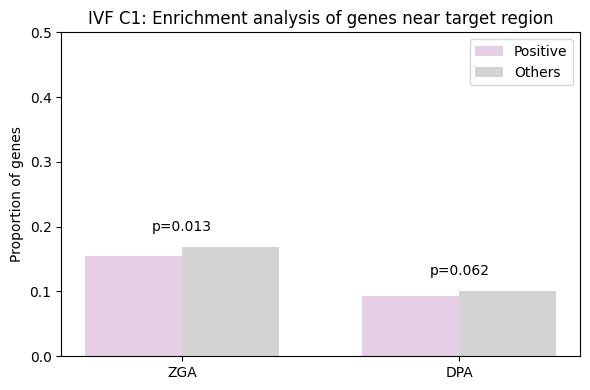

In [5]:
#major ZGA 和DPA 基因 在 正相关区域 富集情况
#IVF 1M
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import fisher_exact, chi2_contingency
import statsmodels.api as sm
from statsmodels.stats.multitest import multipletests

# 构造x轴刻度标签、数据
labels = ['ZGA', 'DPA']
first = [ZGA_target_overlap_proportion, DPA_target_overlap_proportion]  # 目标区域基因比例
second = [ZGA_non_target_overlap_proportion, DPA_non_target_overlap_proportion]  # 非目标区域基因比例

# 三个列联表
contingency_tables = [
    [[1016, 2316], [5542, 11415]],
    [[609, 1391], [5949, 12340]]
]

# 计算 Fisher 精确检验 p 值、优势比（OR）
p_values = []
odds_ratios = []
for table in contingency_tables:
    or_value, p_value = fisher_exact(table)
    odds_ratios.append(or_value)
    p_values.append(p_value)

# 计算卡方检验 p 值
chi2_p_values = []
for table in contingency_tables:
    chi2, p_chi, _, _ = chi2_contingency(table)
    chi2_p_values.append(p_chi)

# 计算 95% 置信区间
confidence_intervals = []
for table in contingency_tables:
    ci = sm.stats.proportion_confint(table[0][0], sum(table[0]), method="wilson")
    confidence_intervals.append(ci)

# FDR 多重检验校正
corrected_p_values = multipletests(p_values, method='fdr_bh')[1]

# 输出检验结果
for i, (p, chi_p, or_value, ci, fdr_p) in enumerate(zip(p_values, chi2_p_values, odds_ratios, confidence_intervals, corrected_p_values)):
    print(f"阈值 {labels[i]}:")
    print(f"  Fisher 精确检验: p-value = {p:.6f}, OR = {or_value:.3f}")
    print(f"  卡方检验: p-value = {chi_p:.6f}")
    print(f"  OR 置信区间: {ci}")
    print(f"  FDR 校正后 p-value = {fdr_p:.6f}")
    print("-" * 50)

# 绘图
plt.figure(figsize=(6, 4))
x = np.arange(len(labels))  # x轴刻度标签位置
width = 0.35  # 柱子宽度

bars1 = plt.bar(x - width/2, first, width, label='Positive', color='#e6cfe6')
bars2 = plt.bar(x + width/2, second, width, label='Others', color='lightgrey')

plt.ylabel('Proportion of genes')
plt.title('IVF C1: Enrichment analysis of genes near target region')
plt.xticks(x, labels)
plt.ylim(0, 0.5)

# 在柱子上标注 p 值，并根据显著性水平加星号
for i, p_value in enumerate(p_values):
    plt.text(i, max(first[i], second[i]) + 0.02, f'p={p_value:.3f}', ha='center', va='bottom', fontsize=10)
    
    # 标注显著性星号
    if first[i] > second[i] and p_value <= 0.05:
        if p_value <= 1.00e-04:
            plt.text(i, max(first[i], second[i]) + 0.05, '****', ha='center', va='bottom', fontsize=12, color='red')
        elif p_value <= 1.00e-03:
            plt.text(i, max(first[i], second[i]) + 0.05, '***', ha='center', va='bottom', fontsize=12, color='red')
        elif p_value <= 1.00e-02:
            plt.text(i, max(first[i], second[i]) + 0.05, '**', ha='center', va='bottom', fontsize=12, color='red')
        elif p_value <= 5.00e-02:
            plt.text(i, max(first[i], second[i]) + 0.05, '*', ha='center', va='bottom', fontsize=12, color='red')

plt.legend()
plt.tight_layout()
plt.show()


In [6]:
#major ZGA 和DPA 基因 在 正相关区域 富集情况
#IVF
import matplotlib.pyplot as plt
from scipy.stats import fisher_exact

def read_gene_list(file_path):
    gene_list = []
    with open(file_path, 'r') as file:
        for line in file:
            gene_id = line.strip().split('\t')[0]  # 获取每行的第一个字段（基因ID）
            gene_list.append(gene_id)
    return gene_list

def enrichment_analysis(diff_genes, target_genes, non_target_genes):
    overlap_diff_target = len(set(diff_genes) & set(target_genes))
    diff_not_in_target = len(diff_genes) - overlap_diff_target
    non_target_genes_not_in_diff = len(set(target_genes) - set(diff_genes))
    non_target_diff_not_in_genes = len(set(non_target_genes) - set(diff_genes))
    
    contingency_table = [
        [overlap_diff_target, diff_not_in_target],
        [non_target_genes_not_in_diff, non_target_diff_not_in_genes]
    ]
    print(contingency_table)
    oddsratio, p_value = fisher_exact(contingency_table)
    
    return p_value

def calculate_overlap_proportion(diff_genes, background_genes):
    overlap = len(set(diff_genes) & set(background_genes))
    num_background_genes = len(background_genes)
    overlap_proportion = overlap / num_background_genes
    
    return overlap_proportion

# 从文件中读取基因列表
ZGA_genes = read_gene_list('/home/lihaoxing/PA_IVF_532_25w_TAD/aggregateTADs/TADstrength_vs_Time/IVF_majorZGAid.txt')
target_genes = read_gene_list('/home/lihaoxing/PA_IVF_532_25w_TAD/aggregateTADs/TADstrength_vs_Time/TADstrength2Gene/IVF_cluster_2_genes.new.txt')
non_target_genes = read_gene_list('/home/lihaoxing/PA_IVF_532_25w_TAD/aggregateTADs/TADstrength_vs_Time/TADstrength2Gene/IVF_cluster_2_genes.non.txt')

# 从文件中读取基因列表
DPA_genes = read_gene_list('/home/lihaoxing/PA_IVF_532_25w_TAD/aggregateTADs/TADstrength_vs_Time/IVF_118_gene_cors_pos_2000.txt')

# 运行富集分析
ZGA_p_value = enrichment_analysis(ZGA_genes, target_genes, non_target_genes)
#print("p-value for target genes:", p_value)

# 运行富集分析
DPA_p_value = enrichment_analysis(DPA_genes, target_genes, non_target_genes)
#print("p-value for target genes:", p_value)

# 计算重叠比例
ZGA_target_overlap_proportion = calculate_overlap_proportion(ZGA_genes, target_genes)
ZGA_non_target_overlap_proportion = calculate_overlap_proportion(ZGA_genes, non_target_genes)

# 计算重叠比例
DPA_target_overlap_proportion = calculate_overlap_proportion(DPA_genes, target_genes)
DPA_non_target_overlap_proportion = calculate_overlap_proportion(DPA_genes, non_target_genes)

# 创建柱状图
overlap_proportions = [ZGA_target_overlap_proportion, ZGA_non_target_overlap_proportion,
                       DPA_target_overlap_proportion, DPA_non_target_overlap_proportion]

print(overlap_proportions)


[[1120, 2212], [5673, 11283]]
[[660, 1340], [6133, 12155]]
[0.16487560724274988, 0.16391256020748426, 0.09715883998233475, 0.09929603556872917]


阈值 ZGA:
  Fisher 精确检验: p-value = 0.872398, OR = 1.007
  卡方检验: p-value = 0.877094
  OR 置信区间: (0.3202917341791116, 0.3523545790584336)
  FDR 校正后 p-value = 0.872398
--------------------------------------------------
阈值 DPA:
  Fisher 精确检验: p-value = 0.635526, OR = 0.976
  卡方检验: p-value = 0.647688
  OR 置信区间: (0.30973547882362323, 0.35091631725200273)
  FDR 校正后 p-value = 0.872398
--------------------------------------------------


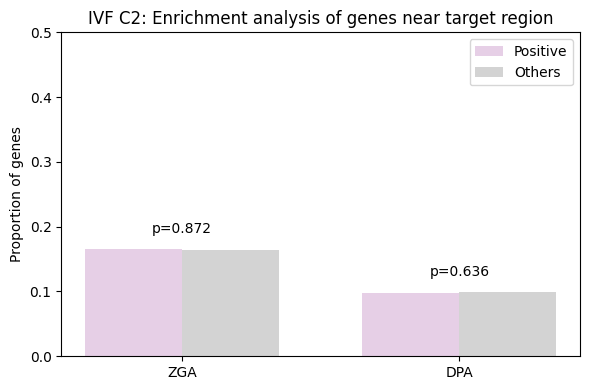

In [7]:
#major ZGA 和DPA 基因 在 正相关区域 富集情况
#IVF 1M
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import fisher_exact, chi2_contingency
import statsmodels.api as sm
from statsmodels.stats.multitest import multipletests

# 构造x轴刻度标签、数据
labels = ['ZGA', 'DPA']
first = [ZGA_target_overlap_proportion, DPA_target_overlap_proportion]  # 目标区域基因比例
second = [ZGA_non_target_overlap_proportion, DPA_non_target_overlap_proportion]  # 非目标区域基因比例

# 三个列联表
contingency_tables = [
    [[1120, 2212], [5673, 11283]],
    [[660, 1340], [6133, 12155]]
]

# 计算 Fisher 精确检验 p 值、优势比（OR）
p_values = []
odds_ratios = []
for table in contingency_tables:
    or_value, p_value = fisher_exact(table)
    odds_ratios.append(or_value)
    p_values.append(p_value)

# 计算卡方检验 p 值
chi2_p_values = []
for table in contingency_tables:
    chi2, p_chi, _, _ = chi2_contingency(table)
    chi2_p_values.append(p_chi)

# 计算 95% 置信区间
confidence_intervals = []
for table in contingency_tables:
    ci = sm.stats.proportion_confint(table[0][0], sum(table[0]), method="wilson")
    confidence_intervals.append(ci)

# FDR 多重检验校正
corrected_p_values = multipletests(p_values, method='fdr_bh')[1]

# 输出检验结果
for i, (p, chi_p, or_value, ci, fdr_p) in enumerate(zip(p_values, chi2_p_values, odds_ratios, confidence_intervals, corrected_p_values)):
    print(f"阈值 {labels[i]}:")
    print(f"  Fisher 精确检验: p-value = {p:.6f}, OR = {or_value:.3f}")
    print(f"  卡方检验: p-value = {chi_p:.6f}")
    print(f"  OR 置信区间: {ci}")
    print(f"  FDR 校正后 p-value = {fdr_p:.6f}")
    print("-" * 50)

# 绘图
plt.figure(figsize=(6, 4))
x = np.arange(len(labels))  # x轴刻度标签位置
width = 0.35  # 柱子宽度

bars1 = plt.bar(x - width/2, first, width, label='Positive', color='#e6cfe6')
bars2 = plt.bar(x + width/2, second, width, label='Others', color='lightgrey')

plt.ylabel('Proportion of genes')
plt.title('IVF C2: Enrichment analysis of genes near target region')
plt.xticks(x, labels)
plt.ylim(0, 0.5)

# 在柱子上标注 p 值，并根据显著性水平加星号
for i, p_value in enumerate(p_values):
    plt.text(i, max(first[i], second[i]) + 0.02, f'p={p_value:.3f}', ha='center', va='bottom', fontsize=10)
    
    # 标注显著性星号
    if first[i] > second[i] and p_value <= 0.05:
        if p_value <= 1.00e-04:
            plt.text(i, max(first[i], second[i]) + 0.05, '****', ha='center', va='bottom', fontsize=12, color='red')
        elif p_value <= 1.00e-03:
            plt.text(i, max(first[i], second[i]) + 0.05, '***', ha='center', va='bottom', fontsize=12, color='red')
        elif p_value <= 1.00e-02:
            plt.text(i, max(first[i], second[i]) + 0.05, '**', ha='center', va='bottom', fontsize=12, color='red')
        elif p_value <= 5.00e-02:
            plt.text(i, max(first[i], second[i]) + 0.05, '*', ha='center', va='bottom', fontsize=12, color='red')

plt.legend()
plt.tight_layout()
plt.show()


In [8]:
#major ZGA 和DPA 基因 在 正相关区域 富集情况
#IVF
import matplotlib.pyplot as plt
from scipy.stats import fisher_exact

def read_gene_list(file_path):
    gene_list = []
    with open(file_path, 'r') as file:
        for line in file:
            gene_id = line.strip().split('\t')[0]  # 获取每行的第一个字段（基因ID）
            gene_list.append(gene_id)
    return gene_list

def enrichment_analysis(diff_genes, target_genes, non_target_genes):
    overlap_diff_target = len(set(diff_genes) & set(target_genes))
    diff_not_in_target = len(diff_genes) - overlap_diff_target
    non_target_genes_not_in_diff = len(set(target_genes) - set(diff_genes))
    non_target_diff_not_in_genes = len(set(non_target_genes) - set(diff_genes))
    
    contingency_table = [
        [overlap_diff_target, diff_not_in_target],
        [non_target_genes_not_in_diff, non_target_diff_not_in_genes]
    ]
    print(contingency_table)
    oddsratio, p_value = fisher_exact(contingency_table)
    
    return p_value

def calculate_overlap_proportion(diff_genes, background_genes):
    overlap = len(set(diff_genes) & set(background_genes))
    num_background_genes = len(background_genes)
    overlap_proportion = overlap / num_background_genes
    
    return overlap_proportion

# 从文件中读取基因列表
ZGA_genes = read_gene_list('/home/lihaoxing/PA_IVF_532_25w_TAD/aggregateTADs/TADstrength_vs_Time/IVF_majorZGAid.txt')
target_genes = read_gene_list('/home/lihaoxing/PA_IVF_532_25w_TAD/aggregateTADs/TADstrength_vs_Time/TADstrength2Gene/IVF_cluster_3_genes.new.txt')
non_target_genes = read_gene_list('/home/lihaoxing/PA_IVF_532_25w_TAD/aggregateTADs/TADstrength_vs_Time/TADstrength2Gene/IVF_cluster_3_genes.non.txt')

# 从文件中读取基因列表
DPA_genes = read_gene_list('/home/lihaoxing/PA_IVF_532_25w_TAD/aggregateTADs/TADstrength_vs_Time/IVF_118_gene_cors_pos_2000.txt')

# 运行富集分析
ZGA_p_value = enrichment_analysis(ZGA_genes, target_genes, non_target_genes)
#print("p-value for target genes:", p_value)

# 运行富集分析
DPA_p_value = enrichment_analysis(DPA_genes, target_genes, non_target_genes)
#print("p-value for target genes:", p_value)

# 计算重叠比例
ZGA_target_overlap_proportion = calculate_overlap_proportion(ZGA_genes, target_genes)
ZGA_non_target_overlap_proportion = calculate_overlap_proportion(ZGA_genes, non_target_genes)

# 计算重叠比例
DPA_target_overlap_proportion = calculate_overlap_proportion(DPA_genes, target_genes)
DPA_non_target_overlap_proportion = calculate_overlap_proportion(DPA_genes, non_target_genes)

# 创建柱状图
overlap_proportions = [ZGA_target_overlap_proportion, ZGA_non_target_overlap_proportion,
                       DPA_target_overlap_proportion, DPA_non_target_overlap_proportion]

print(overlap_proportions)


[[422, 2910], [2334, 14623]]
[[252, 1748], [2504, 15785]]
[0.15312046444121916, 0.1659251654118184, 0.09143686502177069, 0.09964636093999543]


阈值 ZGA:
  Fisher 精确检验: p-value = 0.091647, OR = 0.909
  卡方检验: p-value = 0.095849
  OR 置信区间: (0.11578633259222273, 0.13837486460101198)
  FDR 校正后 p-value = 0.180210
--------------------------------------------------
阈值 DPA:
  Fisher 精确检验: p-value = 0.180210, OR = 0.909
  卡方检验: p-value = 0.187486
  OR 置信区间: (0.11216957148412329, 0.14126437988225385)
  FDR 校正后 p-value = 0.180210
--------------------------------------------------


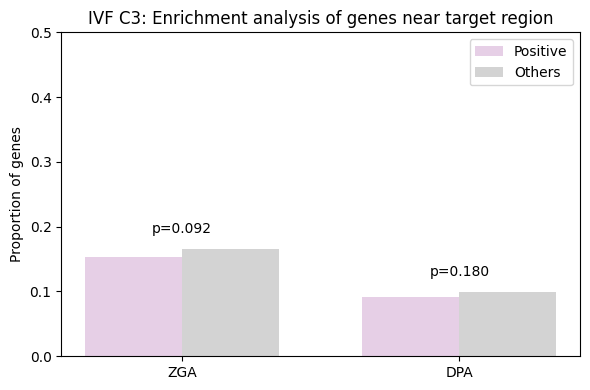

In [9]:
#major ZGA 和DPA 基因 在 正相关区域 富集情况
#IVF 1M
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import fisher_exact, chi2_contingency
import statsmodels.api as sm
from statsmodels.stats.multitest import multipletests

# 构造x轴刻度标签、数据
labels = ['ZGA', 'DPA']
first = [ZGA_target_overlap_proportion, DPA_target_overlap_proportion]  # 目标区域基因比例
second = [ZGA_non_target_overlap_proportion, DPA_non_target_overlap_proportion]  # 非目标区域基因比例

# 三个列联表
contingency_tables = [
    [[422, 2910], [2334, 14623]],
    [[252, 1748], [2504, 15785]]
]

# 计算 Fisher 精确检验 p 值、优势比（OR）
p_values = []
odds_ratios = []
for table in contingency_tables:
    or_value, p_value = fisher_exact(table)
    odds_ratios.append(or_value)
    p_values.append(p_value)

# 计算卡方检验 p 值
chi2_p_values = []
for table in contingency_tables:
    chi2, p_chi, _, _ = chi2_contingency(table)
    chi2_p_values.append(p_chi)

# 计算 95% 置信区间
confidence_intervals = []
for table in contingency_tables:
    ci = sm.stats.proportion_confint(table[0][0], sum(table[0]), method="wilson")
    confidence_intervals.append(ci)

# FDR 多重检验校正
corrected_p_values = multipletests(p_values, method='fdr_bh')[1]

# 输出检验结果
for i, (p, chi_p, or_value, ci, fdr_p) in enumerate(zip(p_values, chi2_p_values, odds_ratios, confidence_intervals, corrected_p_values)):
    print(f"阈值 {labels[i]}:")
    print(f"  Fisher 精确检验: p-value = {p:.6f}, OR = {or_value:.3f}")
    print(f"  卡方检验: p-value = {chi_p:.6f}")
    print(f"  OR 置信区间: {ci}")
    print(f"  FDR 校正后 p-value = {fdr_p:.6f}")
    print("-" * 50)

# 绘图
plt.figure(figsize=(6, 4))
x = np.arange(len(labels))  # x轴刻度标签位置
width = 0.35  # 柱子宽度

bars1 = plt.bar(x - width/2, first, width, label='Positive', color='#e6cfe6')
bars2 = plt.bar(x + width/2, second, width, label='Others', color='lightgrey')

plt.ylabel('Proportion of genes')
plt.title('IVF C3: Enrichment analysis of genes near target region')
plt.xticks(x, labels)
plt.ylim(0, 0.5)

# 在柱子上标注 p 值，并根据显著性水平加星号
for i, p_value in enumerate(p_values):
    plt.text(i, max(first[i], second[i]) + 0.02, f'p={p_value:.3f}', ha='center', va='bottom', fontsize=10)
    
    # 标注显著性星号
    if first[i] > second[i] and p_value <= 0.05:
        if p_value <= 1.00e-04:
            plt.text(i, max(first[i], second[i]) + 0.05, '****', ha='center', va='bottom', fontsize=12, color='red')
        elif p_value <= 1.00e-03:
            plt.text(i, max(first[i], second[i]) + 0.05, '***', ha='center', va='bottom', fontsize=12, color='red')
        elif p_value <= 1.00e-02:
            plt.text(i, max(first[i], second[i]) + 0.05, '**', ha='center', va='bottom', fontsize=12, color='red')
        elif p_value <= 5.00e-02:
            plt.text(i, max(first[i], second[i]) + 0.05, '*', ha='center', va='bottom', fontsize=12, color='red')

plt.legend()
plt.tight_layout()
plt.show()


In [10]:
#major ZGA 和DPA 基因 在 正相关区域 富集情况
#IVF
import matplotlib.pyplot as plt
from scipy.stats import fisher_exact

def read_gene_list(file_path):
    gene_list = []
    with open(file_path, 'r') as file:
        for line in file:
            gene_id = line.strip().split('\t')[0]  # 获取每行的第一个字段（基因ID）
            gene_list.append(gene_id)
    return gene_list

def enrichment_analysis(diff_genes, target_genes, non_target_genes):
    overlap_diff_target = len(set(diff_genes) & set(target_genes))
    diff_not_in_target = len(diff_genes) - overlap_diff_target
    non_target_genes_not_in_diff = len(set(target_genes) - set(diff_genes))
    non_target_diff_not_in_genes = len(set(non_target_genes) - set(diff_genes))
    
    contingency_table = [
        [overlap_diff_target, diff_not_in_target],
        [non_target_genes_not_in_diff, non_target_diff_not_in_genes]
    ]
    print(contingency_table)
    oddsratio, p_value = fisher_exact(contingency_table)
    
    return p_value

def calculate_overlap_proportion(diff_genes, background_genes):
    overlap = len(set(diff_genes) & set(background_genes))
    num_background_genes = len(background_genes)
    overlap_proportion = overlap / num_background_genes
    
    return overlap_proportion

# 从文件中读取基因列表
ZGA_genes = read_gene_list('/home/lihaoxing/PA_IVF_532_25w_TAD/aggregateTADs/TADstrength_vs_Time/IVF_majorZGAid.txt')
target_genes = read_gene_list('/home/lihaoxing/PA_IVF_532_25w_TAD/aggregateTADs/TADstrength_vs_Time/TADstrength2Gene/IVF_cluster_4_genes.new.txt')
non_target_genes = read_gene_list('/home/lihaoxing/PA_IVF_532_25w_TAD/aggregateTADs/TADstrength_vs_Time/TADstrength2Gene/IVF_cluster_4_genes.non.txt')

# 从文件中读取基因列表
DPA_genes = read_gene_list('/home/lihaoxing/PA_IVF_532_25w_TAD/aggregateTADs/TADstrength_vs_Time/IVF_118_gene_cors_pos_2000.txt')

# 运行富集分析
ZGA_p_value = enrichment_analysis(ZGA_genes, target_genes, non_target_genes)
#print("p-value for target genes:", p_value)

# 运行富集分析
DPA_p_value = enrichment_analysis(DPA_genes, target_genes, non_target_genes)
#print("p-value for target genes:", p_value)

# 计算重叠比例
ZGA_target_overlap_proportion = calculate_overlap_proportion(ZGA_genes, target_genes)
ZGA_non_target_overlap_proportion = calculate_overlap_proportion(ZGA_genes, non_target_genes)

# 计算重叠比例
DPA_target_overlap_proportion = calculate_overlap_proportion(DPA_genes, target_genes)
DPA_non_target_overlap_proportion = calculate_overlap_proportion(DPA_genes, non_target_genes)

# 创建柱状图
overlap_proportions = [ZGA_target_overlap_proportion, ZGA_non_target_overlap_proportion,
                       DPA_target_overlap_proportion, DPA_non_target_overlap_proportion]

print(overlap_proportions)


[[99, 3233], [549, 16408]]
[[65, 1935], [583, 17706]]
[0.1527777777777778, 0.16456211812627292, 0.10030864197530864, 0.09847250509164969]


阈值 ZGA:
  Fisher 精确检验: p-value = 0.450752, OR = 0.915
  卡方检验: p-value = 0.455873
  OR 置信区间: (0.02446622374653374, 0.03604068622275787)
  FDR 校正后 p-value = 0.893376
--------------------------------------------------
阈值 DPA:
  Fisher 精确检验: p-value = 0.893376, OR = 1.020
  卡方检验: p-value = 0.933495
  OR 置信区间: (0.02558069882617027, 0.04121174038180121)
  FDR 校正后 p-value = 0.893376
--------------------------------------------------


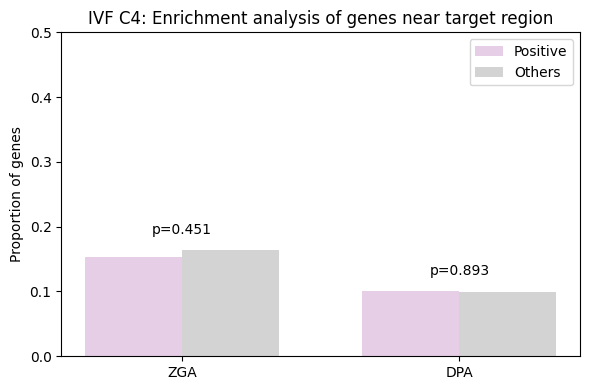

In [12]:
#major ZGA 和DPA 基因 在 正相关区域 富集情况
#IVF 1M
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import fisher_exact, chi2_contingency
import statsmodels.api as sm
from statsmodels.stats.multitest import multipletests

# 构造x轴刻度标签、数据
labels = ['ZGA', 'DPA']
first = [ZGA_target_overlap_proportion, DPA_target_overlap_proportion]  # 目标区域基因比例
second = [ZGA_non_target_overlap_proportion, DPA_non_target_overlap_proportion]  # 非目标区域基因比例

# 三个列联表
contingency_tables = [
    [[99, 3233], [549, 16408]],
    [[65, 1935], [583, 17706]]
]

# 计算 Fisher 精确检验 p 值、优势比（OR）
p_values = []
odds_ratios = []
for table in contingency_tables:
    or_value, p_value = fisher_exact(table)
    odds_ratios.append(or_value)
    p_values.append(p_value)

# 计算卡方检验 p 值
chi2_p_values = []
for table in contingency_tables:
    chi2, p_chi, _, _ = chi2_contingency(table)
    chi2_p_values.append(p_chi)

# 计算 95% 置信区间
confidence_intervals = []
for table in contingency_tables:
    ci = sm.stats.proportion_confint(table[0][0], sum(table[0]), method="wilson")
    confidence_intervals.append(ci)

# FDR 多重检验校正
corrected_p_values = multipletests(p_values, method='fdr_bh')[1]

# 输出检验结果
for i, (p, chi_p, or_value, ci, fdr_p) in enumerate(zip(p_values, chi2_p_values, odds_ratios, confidence_intervals, corrected_p_values)):
    print(f"阈值 {labels[i]}:")
    print(f"  Fisher 精确检验: p-value = {p:.6f}, OR = {or_value:.3f}")
    print(f"  卡方检验: p-value = {chi_p:.6f}")
    print(f"  OR 置信区间: {ci}")
    print(f"  FDR 校正后 p-value = {fdr_p:.6f}")
    print("-" * 50)

# 绘图
plt.figure(figsize=(6, 4))
x = np.arange(len(labels))  # x轴刻度标签位置
width = 0.35  # 柱子宽度

bars1 = plt.bar(x - width/2, first, width, label='Positive', color='#e6cfe6')
bars2 = plt.bar(x + width/2, second, width, label='Others', color='lightgrey')

plt.ylabel('Proportion of genes')
plt.title('IVF C4: Enrichment analysis of genes near target region')
plt.xticks(x, labels)
plt.ylim(0, 0.5)

# 在柱子上标注 p 值，并根据显著性水平加星号
for i, p_value in enumerate(p_values):
    plt.text(i, max(first[i], second[i]) + 0.02, f'p={p_value:.3f}', ha='center', va='bottom', fontsize=10)
    
    # 标注显著性星号
    if first[i] > second[i] and p_value <= 0.05:
        if p_value <= 1.00e-04:
            plt.text(i, max(first[i], second[i]) + 0.05, '****', ha='center', va='bottom', fontsize=12, color='red')
        elif p_value <= 1.00e-03:
            plt.text(i, max(first[i], second[i]) + 0.05, '***', ha='center', va='bottom', fontsize=12, color='red')
        elif p_value <= 1.00e-02:
            plt.text(i, max(first[i], second[i]) + 0.05, '**', ha='center', va='bottom', fontsize=12, color='red')
        elif p_value <= 5.00e-02:
            plt.text(i, max(first[i], second[i]) + 0.05, '*', ha='center', va='bottom', fontsize=12, color='red')

plt.legend()
plt.tight_layout()
plt.show()


In [29]:
#major ZGA 和DPA 基因 在 正相关区域 富集情况
#PA
import matplotlib.pyplot as plt
from scipy.stats import fisher_exact

def read_gene_list(file_path):
    gene_list = []
    with open(file_path, 'r') as file:
        for line in file:
            gene_id = line.strip().split('\t')[0]  # 获取每行的第一个字段（基因ID）
            gene_list.append(gene_id)
    return gene_list

def enrichment_analysis(diff_genes, target_genes, non_target_genes):
    overlap_diff_target = len(set(diff_genes) & set(target_genes))
    diff_not_in_target = len(diff_genes) - overlap_diff_target
    non_target_genes_not_in_diff = len(set(target_genes) - set(diff_genes))
    non_target_diff_not_in_genes = len(set(non_target_genes) - set(diff_genes))
    
    contingency_table = [
        [overlap_diff_target, diff_not_in_target],
        [non_target_genes_not_in_diff, non_target_diff_not_in_genes]
    ]
    print(contingency_table)
    oddsratio, p_value = fisher_exact(contingency_table)
    
    return p_value

def calculate_overlap_proportion(diff_genes, background_genes):
    overlap = len(set(diff_genes) & set(background_genes))
    num_background_genes = len(background_genes)
    overlap_proportion = overlap / num_background_genes
    
    return overlap_proportion

# 从文件中读取基因列表
ZGA_genes = read_gene_list('/home/lihaoxing/PA_IVF_532_25w_TAD/aggregateTADs/TADstrength_vs_Time/PA_majorZGAid.txt')
target_genes = read_gene_list('/home/lihaoxing/TADstrength_vs_Time/meme/PA_cluster_0_genes.new.txt')
non_target_genes = read_gene_list('/home/lihaoxing/TADstrength_vs_Time/meme/PA_cluster_0_genes.non.txt')

# 从文件中读取基因列表
DPA_genes = read_gene_list('/home/lihaoxing/PA_IVF_532_25w_TAD/aggregateTADs/TADstrength_vs_Time/PA_80_gene_cors_pos_2000.txt')

# 运行富集分析
ZGA_p_value = enrichment_analysis(ZGA_genes, target_genes, non_target_genes)
#print("p-value for target genes:", p_value)

# 运行富集分析
DPA_p_value = enrichment_analysis(DPA_genes, target_genes, non_target_genes)
#print("p-value for target genes:", p_value)

# 计算重叠比例
ZGA_target_overlap_proportion = calculate_overlap_proportion(ZGA_genes, target_genes)
ZGA_non_target_overlap_proportion = calculate_overlap_proportion(ZGA_genes, non_target_genes)

# 计算重叠比例
DPA_target_overlap_proportion = calculate_overlap_proportion(DPA_genes, target_genes)
DPA_non_target_overlap_proportion = calculate_overlap_proportion(DPA_genes, non_target_genes)

# 创建柱状图
overlap_proportions = [ZGA_target_overlap_proportion, ZGA_non_target_overlap_proportion,
                       DPA_target_overlap_proportion, DPA_non_target_overlap_proportion]

print(overlap_proportions)


[[1018, 2815], [4369, 12087]]
[[540, 1460], [4847, 13441]]
[0.18897345461295711, 0.18884638614858062, 0.10024132170038982, 0.0979800013421918]


阈值 ZGA:
  Fisher 精确检验: p-value = 1.000000, OR = 1.000
  卡方检验: p-value = 1.000000
  OR 置信区间: (0.2518465623554083, 0.279799449269911)
  FDR 校正后 p-value = 1.000000
--------------------------------------------------
阈值 DPA:
  Fisher 精确检验: p-value = 0.631310, OR = 1.026
  卡方检验: p-value = 0.652353
  OR 置信区间: (0.2509975561876622, 0.2898842855617142)
  FDR 校正后 p-value = 1.000000
--------------------------------------------------


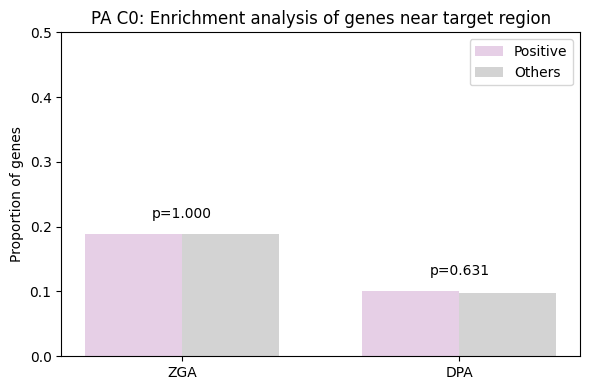

In [30]:
#major ZGA 和DPA 基因 在 正相关区域 富集情况
#PA
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import fisher_exact, chi2_contingency
import statsmodels.api as sm
from statsmodels.stats.multitest import multipletests
from IPython.display import SVG, display

plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['svg.fonttype'] = 'none'
plt.rcParams['svg.hashsalt'] = 'hello'

# 构造x轴刻度标签、数据
labels = ['ZGA', 'DPA']
first = [ZGA_target_overlap_proportion, DPA_target_overlap_proportion]  # 目标区域基因比例
second = [ZGA_non_target_overlap_proportion, DPA_non_target_overlap_proportion]  # 非目标区域基因比例

# 三个列联表
contingency_tables = [
    [[1018, 2815], [4369, 12087]],
    [[540, 1460], [4847, 13441]]
]

# 计算 Fisher 精确检验 p 值、优势比（OR）
p_values = []
odds_ratios = []
for table in contingency_tables:
    or_value, p_value = fisher_exact(table)
    odds_ratios.append(or_value)
    p_values.append(p_value)

# 计算卡方检验 p 值
chi2_p_values = []
for table in contingency_tables:
    chi2, p_chi, _, _ = chi2_contingency(table)
    chi2_p_values.append(p_chi)

# 计算 95% 置信区间
confidence_intervals = []
for table in contingency_tables:
    ci = sm.stats.proportion_confint(table[0][0], sum(table[0]), method="wilson")
    confidence_intervals.append(ci)

# FDR 多重检验校正
corrected_p_values = multipletests(p_values, method='fdr_bh')[1]

# 输出检验结果
for i, (p, chi_p, or_value, ci, fdr_p) in enumerate(zip(p_values, chi2_p_values, odds_ratios, confidence_intervals, corrected_p_values)):
    print(f"阈值 {labels[i]}:")
    print(f"  Fisher 精确检验: p-value = {p:.6f}, OR = {or_value:.3f}")
    print(f"  卡方检验: p-value = {chi_p:.6f}")
    print(f"  OR 置信区间: {ci}")
    print(f"  FDR 校正后 p-value = {fdr_p:.6f}")
    print("-" * 50)

# 绘图
plt.figure(figsize=(6, 4))
x = np.arange(len(labels))  # x轴刻度标签位置
width = 0.35  # 柱子宽度

bars1 = plt.bar(x - width/2, first, width, label='Positive', color='#e6cfe6')
bars2 = plt.bar(x + width/2, second, width, label='Others', color='lightgrey')

plt.ylabel('Proportion of genes')
plt.title('PA C0: Enrichment analysis of genes near target region')
plt.xticks(x, labels)
plt.ylim(0, 0.5)

# 在柱子上标注 p 值，并根据显著性水平加星号
for i, p_value in enumerate(p_values):
    plt.text(i, max(first[i], second[i]) + 0.02, f'p={p_value:.3f}', ha='center', va='bottom', fontsize=10)
    
    # 标注显著性星号
    if first[i] > second[i] and p_value <= 0.05:
        if p_value <= 1.00e-04:
            plt.text(i, max(first[i], second[i]) + 0.05, '****', ha='center', va='bottom', fontsize=12, color='red')
        elif p_value <= 1.00e-03:
            plt.text(i, max(first[i], second[i]) + 0.05, '***', ha='center', va='bottom', fontsize=12, color='red')
        elif p_value <= 1.00e-02:
            plt.text(i, max(first[i], second[i]) + 0.05, '**', ha='center', va='bottom', fontsize=12, color='red')
        elif p_value <= 5.00e-02:
            plt.text(i, max(first[i], second[i]) + 0.05, '*', ha='center', va='bottom', fontsize=12, color='red')

plt.legend()
plt.tight_layout()
# 保存图像为 PDF
plt.savefig('PA_TADstrength_vs_Pseudotime_C0_enrich.svg', dpi=300, bbox_inches='tight', transparent=True)


In [15]:
#major ZGA 和DPA 基因 在 正相关区域 富集情况
#PA
import matplotlib.pyplot as plt
from scipy.stats import fisher_exact

def read_gene_list(file_path):
    gene_list = []
    with open(file_path, 'r') as file:
        for line in file:
            gene_id = line.strip().split('\t')[0]  # 获取每行的第一个字段（基因ID）
            gene_list.append(gene_id)
    return gene_list

def enrichment_analysis(diff_genes, target_genes, non_target_genes):
    overlap_diff_target = len(set(diff_genes) & set(target_genes))
    diff_not_in_target = len(diff_genes) - overlap_diff_target
    non_target_genes_not_in_diff = len(set(target_genes) - set(diff_genes))
    non_target_diff_not_in_genes = len(set(non_target_genes) - set(diff_genes))
    
    contingency_table = [
        [overlap_diff_target, diff_not_in_target],
        [non_target_genes_not_in_diff, non_target_diff_not_in_genes]
    ]
    print(contingency_table)
    oddsratio, p_value = fisher_exact(contingency_table)
    
    return p_value

def calculate_overlap_proportion(diff_genes, background_genes):
    overlap = len(set(diff_genes) & set(background_genes))
    num_background_genes = len(background_genes)
    overlap_proportion = overlap / num_background_genes
    
    return overlap_proportion

# 从文件中读取基因列表
ZGA_genes = read_gene_list('/home/lihaoxing/PA_IVF_532_25w_TAD/aggregateTADs/TADstrength_vs_Time/PA_majorZGAid.txt')
target_genes = read_gene_list('/home/lihaoxing/PA_IVF_532_25w_TAD/aggregateTADs/TADstrength_vs_Time/TADstrength2Gene/PA_cluster_1_genes.new.txt')
non_target_genes = read_gene_list('/home/lihaoxing/PA_IVF_532_25w_TAD/aggregateTADs/TADstrength_vs_Time/TADstrength2Gene/PA_cluster_1_genes.non.txt')

# 从文件中读取基因列表
DPA_genes = read_gene_list('/home/lihaoxing/PA_IVF_532_25w_TAD/aggregateTADs/TADstrength_vs_Time/PA_80_gene_cors_pos_2000.txt')

# 运行富集分析
ZGA_p_value = enrichment_analysis(ZGA_genes, target_genes, non_target_genes)
#print("p-value for target genes:", p_value)

# 运行富集分析
DPA_p_value = enrichment_analysis(DPA_genes, target_genes, non_target_genes)
#print("p-value for target genes:", p_value)

# 计算重叠比例
ZGA_target_overlap_proportion = calculate_overlap_proportion(ZGA_genes, target_genes)
ZGA_non_target_overlap_proportion = calculate_overlap_proportion(ZGA_genes, non_target_genes)

# 计算重叠比例
DPA_target_overlap_proportion = calculate_overlap_proportion(DPA_genes, target_genes)
DPA_non_target_overlap_proportion = calculate_overlap_proportion(DPA_genes, non_target_genes)

# 创建柱状图
overlap_proportions = [ZGA_target_overlap_proportion, ZGA_non_target_overlap_proportion,
                       DPA_target_overlap_proportion, DPA_non_target_overlap_proportion]

print(overlap_proportions)


[[500, 3333], [2353, 14103]]
[[245, 1755], [2608, 15680]]
[0.1752541184717841, 0.19110983653570404, 0.0858745180511742, 0.10065959277315745]


阈值 ZGA:
  Fisher 精确检验: p-value = 0.044226, OR = 0.899
  卡方检验: p-value = 0.047062
  OR 置信区间: (0.12015294763691613, 0.14147930107456405)
  FDR 校正后 p-value = 0.044226
--------------------------------------------------
阈值 DPA:
  Fisher 精确检验: p-value = 0.013400, OR = 0.839
  卡方检验: p-value = 0.015435
  OR 置信区间: (0.10885029598940679, 0.13759707470793917)
  FDR 校正后 p-value = 0.026800
--------------------------------------------------


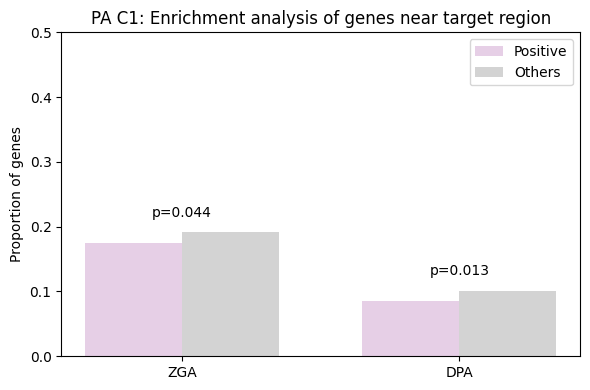

In [16]:
#major ZGA 和DPA 基因 在 正相关区域 富集情况
#PA
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import fisher_exact, chi2_contingency
import statsmodels.api as sm
from statsmodels.stats.multitest import multipletests

# 构造x轴刻度标签、数据
labels = ['ZGA', 'DPA']
first = [ZGA_target_overlap_proportion, DPA_target_overlap_proportion]  # 目标区域基因比例
second = [ZGA_non_target_overlap_proportion, DPA_non_target_overlap_proportion]  # 非目标区域基因比例

# 三个列联表
contingency_tables = [
    [[500, 3333], [2353, 14103]],
    [[245, 1755], [2608, 15680]]
]

# 计算 Fisher 精确检验 p 值、优势比（OR）
p_values = []
odds_ratios = []
for table in contingency_tables:
    or_value, p_value = fisher_exact(table)
    odds_ratios.append(or_value)
    p_values.append(p_value)

# 计算卡方检验 p 值
chi2_p_values = []
for table in contingency_tables:
    chi2, p_chi, _, _ = chi2_contingency(table)
    chi2_p_values.append(p_chi)

# 计算 95% 置信区间
confidence_intervals = []
for table in contingency_tables:
    ci = sm.stats.proportion_confint(table[0][0], sum(table[0]), method="wilson")
    confidence_intervals.append(ci)

# FDR 多重检验校正
corrected_p_values = multipletests(p_values, method='fdr_bh')[1]

# 输出检验结果
for i, (p, chi_p, or_value, ci, fdr_p) in enumerate(zip(p_values, chi2_p_values, odds_ratios, confidence_intervals, corrected_p_values)):
    print(f"阈值 {labels[i]}:")
    print(f"  Fisher 精确检验: p-value = {p:.6f}, OR = {or_value:.3f}")
    print(f"  卡方检验: p-value = {chi_p:.6f}")
    print(f"  OR 置信区间: {ci}")
    print(f"  FDR 校正后 p-value = {fdr_p:.6f}")
    print("-" * 50)

# 绘图
plt.figure(figsize=(6, 4))
x = np.arange(len(labels))  # x轴刻度标签位置
width = 0.35  # 柱子宽度

bars1 = plt.bar(x - width/2, first, width, label='Positive', color='#e6cfe6')
bars2 = plt.bar(x + width/2, second, width, label='Others', color='lightgrey')

plt.ylabel('Proportion of genes')
plt.title('PA C1: Enrichment analysis of genes near target region')
plt.xticks(x, labels)
plt.ylim(0, 0.5)

# 在柱子上标注 p 值，并根据显著性水平加星号
for i, p_value in enumerate(p_values):
    plt.text(i, max(first[i], second[i]) + 0.02, f'p={p_value:.3f}', ha='center', va='bottom', fontsize=10)
    
    # 标注显著性星号
    if first[i] > second[i] and p_value <= 0.05:
        if p_value <= 1.00e-04:
            plt.text(i, max(first[i], second[i]) + 0.05, '****', ha='center', va='bottom', fontsize=12, color='red')
        elif p_value <= 1.00e-03:
            plt.text(i, max(first[i], second[i]) + 0.05, '***', ha='center', va='bottom', fontsize=12, color='red')
        elif p_value <= 1.00e-02:
            plt.text(i, max(first[i], second[i]) + 0.05, '**', ha='center', va='bottom', fontsize=12, color='red')
        elif p_value <= 5.00e-02:
            plt.text(i, max(first[i], second[i]) + 0.05, '*', ha='center', va='bottom', fontsize=12, color='red')

plt.legend()
plt.tight_layout()
plt.show()


In [17]:
#major ZGA 和DPA 基因 在 正相关区域 富集情况
#PA
import matplotlib.pyplot as plt
from scipy.stats import fisher_exact

def read_gene_list(file_path):
    gene_list = []
    with open(file_path, 'r') as file:
        for line in file:
            gene_id = line.strip().split('\t')[0]  # 获取每行的第一个字段（基因ID）
            gene_list.append(gene_id)
    return gene_list

def enrichment_analysis(diff_genes, target_genes, non_target_genes):
    overlap_diff_target = len(set(diff_genes) & set(target_genes))
    diff_not_in_target = len(diff_genes) - overlap_diff_target
    non_target_genes_not_in_diff = len(set(target_genes) - set(diff_genes))
    non_target_diff_not_in_genes = len(set(non_target_genes) - set(diff_genes))
    
    contingency_table = [
        [overlap_diff_target, diff_not_in_target],
        [non_target_genes_not_in_diff, non_target_diff_not_in_genes]
    ]
    print(contingency_table)
    oddsratio, p_value = fisher_exact(contingency_table)
    
    return p_value

def calculate_overlap_proportion(diff_genes, background_genes):
    overlap = len(set(diff_genes) & set(background_genes))
    num_background_genes = len(background_genes)
    overlap_proportion = overlap / num_background_genes
    
    return overlap_proportion

# 从文件中读取基因列表
ZGA_genes = read_gene_list('/home/lihaoxing/PA_IVF_532_25w_TAD/aggregateTADs/TADstrength_vs_Time/PA_majorZGAid.txt')
target_genes = read_gene_list('/home/lihaoxing/PA_IVF_532_25w_TAD/aggregateTADs/TADstrength_vs_Time/TADstrength2Gene/PA_cluster_2_genes.new.txt')
non_target_genes = read_gene_list('/home/lihaoxing/PA_IVF_532_25w_TAD/aggregateTADs/TADstrength_vs_Time/TADstrength2Gene/PA_cluster_2_genes.non.txt')

# 从文件中读取基因列表
DPA_genes = read_gene_list('/home/lihaoxing/PA_IVF_532_25w_TAD/aggregateTADs/TADstrength_vs_Time/PA_80_gene_cors_pos_2000.txt')

# 运行富集分析
ZGA_p_value = enrichment_analysis(ZGA_genes, target_genes, non_target_genes)
#print("p-value for target genes:", p_value)

# 运行富集分析
DPA_p_value = enrichment_analysis(DPA_genes, target_genes, non_target_genes)
#print("p-value for target genes:", p_value)

# 计算重叠比例
ZGA_target_overlap_proportion = calculate_overlap_proportion(ZGA_genes, target_genes)
ZGA_non_target_overlap_proportion = calculate_overlap_proportion(ZGA_genes, non_target_genes)

# 计算重叠比例
DPA_target_overlap_proportion = calculate_overlap_proportion(DPA_genes, target_genes)
DPA_non_target_overlap_proportion = calculate_overlap_proportion(DPA_genes, non_target_genes)

# 创建柱状图
overlap_proportions = [ZGA_target_overlap_proportion, ZGA_non_target_overlap_proportion,
                       DPA_target_overlap_proportion, DPA_non_target_overlap_proportion]

print(overlap_proportions)


[[774, 3059], [3318, 13138]]
[[412, 1588], [3680, 14608]]
[0.18914956011730205, 0.18881205235860707, 0.10068426197458455, 0.09804890096320079]


阈值 ZGA:
  Fisher 精确检验: p-value = 0.964354, OR = 1.002
  卡方检验: p-value = 0.984347
  OR 置信区间: (0.1895232198220896, 0.214934841704819)
  FDR 校正后 p-value = 0.964354
--------------------------------------------------
阈值 DPA:
  Fisher 精确检验: p-value = 0.617859, OR = 1.030
  卡方检验: p-value = 0.634121
  OR 置信区间: (0.188847021374138, 0.22428020242723862)
  FDR 校正后 p-value = 0.964354
--------------------------------------------------


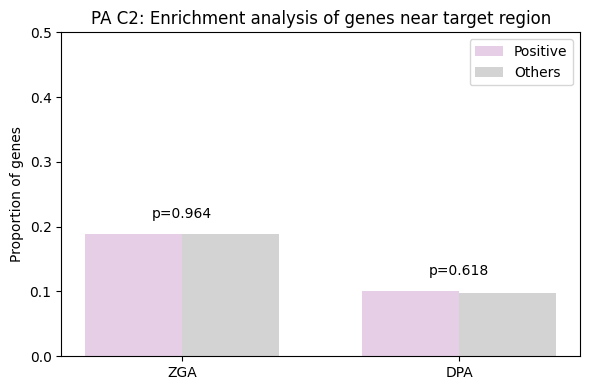

In [18]:
#major ZGA 和DPA 基因 在 正相关区域 富集情况
#PA
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import fisher_exact, chi2_contingency
import statsmodels.api as sm
from statsmodels.stats.multitest import multipletests

# 构造x轴刻度标签、数据
labels = ['ZGA', 'DPA']
first = [ZGA_target_overlap_proportion, DPA_target_overlap_proportion]  # 目标区域基因比例
second = [ZGA_non_target_overlap_proportion, DPA_non_target_overlap_proportion]  # 非目标区域基因比例

# 三个列联表
contingency_tables = [
    [[774, 3059], [3318, 13138]],
    [[412, 1588], [3680, 14608]]
]

# 计算 Fisher 精确检验 p 值、优势比（OR）
p_values = []
odds_ratios = []
for table in contingency_tables:
    or_value, p_value = fisher_exact(table)
    odds_ratios.append(or_value)
    p_values.append(p_value)

# 计算卡方检验 p 值
chi2_p_values = []
for table in contingency_tables:
    chi2, p_chi, _, _ = chi2_contingency(table)
    chi2_p_values.append(p_chi)

# 计算 95% 置信区间
confidence_intervals = []
for table in contingency_tables:
    ci = sm.stats.proportion_confint(table[0][0], sum(table[0]), method="wilson")
    confidence_intervals.append(ci)

# FDR 多重检验校正
corrected_p_values = multipletests(p_values, method='fdr_bh')[1]

# 输出检验结果
for i, (p, chi_p, or_value, ci, fdr_p) in enumerate(zip(p_values, chi2_p_values, odds_ratios, confidence_intervals, corrected_p_values)):
    print(f"阈值 {labels[i]}:")
    print(f"  Fisher 精确检验: p-value = {p:.6f}, OR = {or_value:.3f}")
    print(f"  卡方检验: p-value = {chi_p:.6f}")
    print(f"  OR 置信区间: {ci}")
    print(f"  FDR 校正后 p-value = {fdr_p:.6f}")
    print("-" * 50)

# 绘图
plt.figure(figsize=(6, 4))
x = np.arange(len(labels))  # x轴刻度标签位置
width = 0.35  # 柱子宽度

bars1 = plt.bar(x - width/2, first, width, label='Positive', color='#e6cfe6')
bars2 = plt.bar(x + width/2, second, width, label='Others', color='lightgrey')

plt.ylabel('Proportion of genes')
plt.title('PA C2: Enrichment analysis of genes near target region')
plt.xticks(x, labels)
plt.ylim(0, 0.5)

# 在柱子上标注 p 值，并根据显著性水平加星号
for i, p_value in enumerate(p_values):
    plt.text(i, max(first[i], second[i]) + 0.02, f'p={p_value:.3f}', ha='center', va='bottom', fontsize=10)
    
    # 标注显著性星号
    if first[i] > second[i] and p_value <= 0.05:
        if p_value <= 1.00e-04:
            plt.text(i, max(first[i], second[i]) + 0.05, '****', ha='center', va='bottom', fontsize=12, color='red')
        elif p_value <= 1.00e-03:
            plt.text(i, max(first[i], second[i]) + 0.05, '***', ha='center', va='bottom', fontsize=12, color='red')
        elif p_value <= 1.00e-02:
            plt.text(i, max(first[i], second[i]) + 0.05, '**', ha='center', va='bottom', fontsize=12, color='red')
        elif p_value <= 5.00e-02:
            plt.text(i, max(first[i], second[i]) + 0.05, '*', ha='center', va='bottom', fontsize=12, color='red')

plt.legend()
plt.tight_layout()
plt.show()


In [19]:
#major ZGA 和DPA 基因 在 正相关区域 富集情况
#PA
import matplotlib.pyplot as plt
from scipy.stats import fisher_exact

def read_gene_list(file_path):
    gene_list = []
    with open(file_path, 'r') as file:
        for line in file:
            gene_id = line.strip().split('\t')[0]  # 获取每行的第一个字段（基因ID）
            gene_list.append(gene_id)
    return gene_list

def enrichment_analysis(diff_genes, target_genes, non_target_genes):
    overlap_diff_target = len(set(diff_genes) & set(target_genes))
    diff_not_in_target = len(diff_genes) - overlap_diff_target
    non_target_genes_not_in_diff = len(set(target_genes) - set(diff_genes))
    non_target_diff_not_in_genes = len(set(non_target_genes) - set(diff_genes))
    
    contingency_table = [
        [overlap_diff_target, diff_not_in_target],
        [non_target_genes_not_in_diff, non_target_diff_not_in_genes]
    ]
    print(contingency_table)
    oddsratio, p_value = fisher_exact(contingency_table)
    
    return p_value

def calculate_overlap_proportion(diff_genes, background_genes):
    overlap = len(set(diff_genes) & set(background_genes))
    num_background_genes = len(background_genes)
    overlap_proportion = overlap / num_background_genes
    
    return overlap_proportion

# 从文件中读取基因列表
ZGA_genes = read_gene_list('/home/lihaoxing/PA_IVF_532_25w_TAD/aggregateTADs/TADstrength_vs_Time/PA_majorZGAid.txt')
target_genes = read_gene_list('/home/lihaoxing/PA_IVF_532_25w_TAD/aggregateTADs/TADstrength_vs_Time/TADstrength2Gene/PA_cluster_3_genes.new.txt')
non_target_genes = read_gene_list('/home/lihaoxing/PA_IVF_532_25w_TAD/aggregateTADs/TADstrength_vs_Time/TADstrength2Gene/PA_cluster_3_genes.non.txt')

# 从文件中读取基因列表
DPA_genes = read_gene_list('/home/lihaoxing/PA_IVF_532_25w_TAD/aggregateTADs/TADstrength_vs_Time/PA_80_gene_cors_pos_2000.txt')

# 运行富集分析
ZGA_p_value = enrichment_analysis(ZGA_genes, target_genes, non_target_genes)
#print("p-value for target genes:", p_value)

# 运行富集分析
DPA_p_value = enrichment_analysis(DPA_genes, target_genes, non_target_genes)
#print("p-value for target genes:", p_value)

# 计算重叠比例
ZGA_target_overlap_proportion = calculate_overlap_proportion(ZGA_genes, target_genes)
ZGA_non_target_overlap_proportion = calculate_overlap_proportion(ZGA_genes, non_target_genes)

# 计算重叠比例
DPA_target_overlap_proportion = calculate_overlap_proportion(DPA_genes, target_genes)
DPA_non_target_overlap_proportion = calculate_overlap_proportion(DPA_genes, non_target_genes)

# 创建柱状图
overlap_proportions = [ZGA_target_overlap_proportion, ZGA_non_target_overlap_proportion,
                       DPA_target_overlap_proportion, DPA_non_target_overlap_proportion]

print(overlap_proportions)


[[694, 3139], [3451, 13005]]
[[354, 1646], [3791, 14497]]
[0.16743063932448735, 0.19438766028619217, 0.08540410132689988, 0.10196369943628818]


阈值 ZGA:
  Fisher 精确检验: p-value = 0.000068, OR = 0.833
  卡方检验: p-value = 0.000081
  OR 置信区间: (0.16919014326325732, 0.1935669510182707)
  FDR 校正后 p-value = 0.000136
--------------------------------------------------
阈值 DPA:
  Fisher 精确检验: p-value = 0.001309, OR = 0.822
  卡方检验: p-value = 0.001572
  OR 置信区间: (0.16089671809231562, 0.1943416944513737)
  FDR 校正后 p-value = 0.001309
--------------------------------------------------


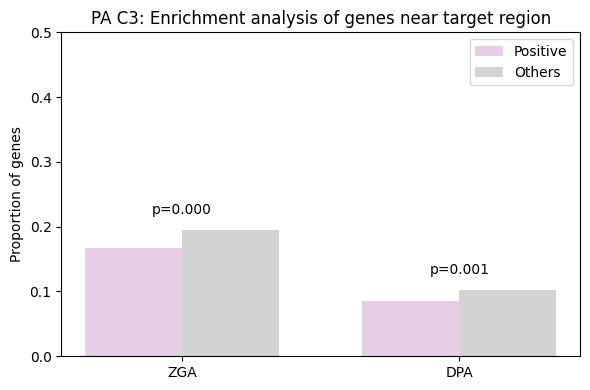

In [20]:
#major ZGA 和DPA 基因 在 正相关区域 富集情况
#PA
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import fisher_exact, chi2_contingency
import statsmodels.api as sm
from statsmodels.stats.multitest import multipletests

# 构造x轴刻度标签、数据
labels = ['ZGA', 'DPA']
first = [ZGA_target_overlap_proportion, DPA_target_overlap_proportion]  # 目标区域基因比例
second = [ZGA_non_target_overlap_proportion, DPA_non_target_overlap_proportion]  # 非目标区域基因比例

# 三个列联表
contingency_tables = [
    [[694, 3139], [3451, 13005]],
    [[354, 1646], [3791, 14497]]
]

# 计算 Fisher 精确检验 p 值、优势比（OR）
p_values = []
odds_ratios = []
for table in contingency_tables:
    or_value, p_value = fisher_exact(table)
    odds_ratios.append(or_value)
    p_values.append(p_value)

# 计算卡方检验 p 值
chi2_p_values = []
for table in contingency_tables:
    chi2, p_chi, _, _ = chi2_contingency(table)
    chi2_p_values.append(p_chi)

# 计算 95% 置信区间
confidence_intervals = []
for table in contingency_tables:
    ci = sm.stats.proportion_confint(table[0][0], sum(table[0]), method="wilson")
    confidence_intervals.append(ci)

# FDR 多重检验校正
corrected_p_values = multipletests(p_values, method='fdr_bh')[1]

# 输出检验结果
for i, (p, chi_p, or_value, ci, fdr_p) in enumerate(zip(p_values, chi2_p_values, odds_ratios, confidence_intervals, corrected_p_values)):
    print(f"阈值 {labels[i]}:")
    print(f"  Fisher 精确检验: p-value = {p:.6f}, OR = {or_value:.3f}")
    print(f"  卡方检验: p-value = {chi_p:.6f}")
    print(f"  OR 置信区间: {ci}")
    print(f"  FDR 校正后 p-value = {fdr_p:.6f}")
    print("-" * 50)

# 绘图
plt.figure(figsize=(6, 4))
x = np.arange(len(labels))  # x轴刻度标签位置
width = 0.35  # 柱子宽度

bars1 = plt.bar(x - width/2, first, width, label='Positive', color='#e6cfe6')
bars2 = plt.bar(x + width/2, second, width, label='Others', color='lightgrey')

plt.ylabel('Proportion of genes')
plt.title('PA C3: Enrichment analysis of genes near target region')
plt.xticks(x, labels)
plt.ylim(0, 0.5)

# 在柱子上标注 p 值，并根据显著性水平加星号
for i, p_value in enumerate(p_values):
    plt.text(i, max(first[i], second[i]) + 0.02, f'p={p_value:.3f}', ha='center', va='bottom', fontsize=10)
    
    # 标注显著性星号
    if first[i] > second[i] and p_value <= 0.05:
        if p_value <= 1.00e-04:
            plt.text(i, max(first[i], second[i]) + 0.05, '****', ha='center', va='bottom', fontsize=12, color='red')
        elif p_value <= 1.00e-03:
            plt.text(i, max(first[i], second[i]) + 0.05, '***', ha='center', va='bottom', fontsize=12, color='red')
        elif p_value <= 1.00e-02:
            plt.text(i, max(first[i], second[i]) + 0.05, '**', ha='center', va='bottom', fontsize=12, color='red')
        elif p_value <= 5.00e-02:
            plt.text(i, max(first[i], second[i]) + 0.05, '*', ha='center', va='bottom', fontsize=12, color='red')

plt.legend()
plt.tight_layout()
plt.show()


In [21]:
#major ZGA 和DPA 基因 在 正相关区域 富集情况
#PA
import matplotlib.pyplot as plt
from scipy.stats import fisher_exact

def read_gene_list(file_path):
    gene_list = []
    with open(file_path, 'r') as file:
        for line in file:
            gene_id = line.strip().split('\t')[0]  # 获取每行的第一个字段（基因ID）
            gene_list.append(gene_id)
    return gene_list

def enrichment_analysis(diff_genes, target_genes, non_target_genes):
    overlap_diff_target = len(set(diff_genes) & set(target_genes))
    diff_not_in_target = len(diff_genes) - overlap_diff_target
    non_target_genes_not_in_diff = len(set(target_genes) - set(diff_genes))
    non_target_diff_not_in_genes = len(set(non_target_genes) - set(diff_genes))
    
    contingency_table = [
        [overlap_diff_target, diff_not_in_target],
        [non_target_genes_not_in_diff, non_target_diff_not_in_genes]
    ]
    print(contingency_table)
    oddsratio, p_value = fisher_exact(contingency_table)
    
    return p_value

def calculate_overlap_proportion(diff_genes, background_genes):
    overlap = len(set(diff_genes) & set(background_genes))
    num_background_genes = len(background_genes)
    overlap_proportion = overlap / num_background_genes
    
    return overlap_proportion

# 从文件中读取基因列表
ZGA_genes = read_gene_list('/home/lihaoxing/PA_IVF_532_25w_TAD/aggregateTADs/TADstrength_vs_Time/PA_majorZGAid.txt')
target_genes = read_gene_list('/home/lihaoxing/PA_IVF_532_25w_TAD/aggregateTADs/TADstrength_vs_Time/TADstrength2Gene/PA_cluster_4_genes.new.txt')
non_target_genes = read_gene_list('/home/lihaoxing/PA_IVF_532_25w_TAD/aggregateTADs/TADstrength_vs_Time/TADstrength2Gene/PA_cluster_4_genes.non.txt')

# 从文件中读取基因列表
DPA_genes = read_gene_list('/home/lihaoxing/PA_IVF_532_25w_TAD/aggregateTADs/TADstrength_vs_Time/PA_80_gene_cors_pos_2000.txt')

# 运行富集分析
ZGA_p_value = enrichment_analysis(ZGA_genes, target_genes, non_target_genes)
#print("p-value for target genes:", p_value)

# 运行富集分析
DPA_p_value = enrichment_analysis(DPA_genes, target_genes, non_target_genes)
#print("p-value for target genes:", p_value)

# 计算重叠比例
ZGA_target_overlap_proportion = calculate_overlap_proportion(ZGA_genes, target_genes)
ZGA_non_target_overlap_proportion = calculate_overlap_proportion(ZGA_genes, non_target_genes)

# 计算重叠比例
DPA_target_overlap_proportion = calculate_overlap_proportion(DPA_genes, target_genes)
DPA_non_target_overlap_proportion = calculate_overlap_proportion(DPA_genes, non_target_genes)

# 创建柱状图
overlap_proportions = [ZGA_target_overlap_proportion, ZGA_non_target_overlap_proportion,
                       DPA_target_overlap_proportion, DPA_non_target_overlap_proportion]

print(overlap_proportions)


[[731, 3102], [3200, 13256]]
[[374, 1626], [3557, 14731]]
[0.18595777155939963, 0.18958244176805036, 0.09514118544899516, 0.09940698172036437]


阈值 ZGA:
  Fisher 精确检验: p-value = 0.617668, OR = 0.976
  卡方检验: p-value = 0.613045
  OR 置信区间: (0.1785871579181425, 0.20345663371437406)
  FDR 校正后 p-value = 0.617668
--------------------------------------------------
阈值 DPA:
  Fisher 精确检验: p-value = 0.438549, OR = 0.953
  卡方检验: p-value = 0.437857
  OR 置信区间: (0.17051756940286192, 0.20468250219520237)
  FDR 校正后 p-value = 0.617668
--------------------------------------------------


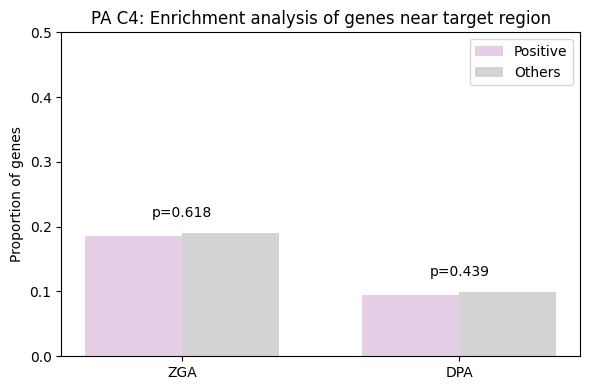

In [22]:
#major ZGA 和DPA 基因 在 正相关区域 富集情况
#PA
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import fisher_exact, chi2_contingency
import statsmodels.api as sm
from statsmodels.stats.multitest import multipletests

# 构造x轴刻度标签、数据
labels = ['ZGA', 'DPA']
first = [ZGA_target_overlap_proportion, DPA_target_overlap_proportion]  # 目标区域基因比例
second = [ZGA_non_target_overlap_proportion, DPA_non_target_overlap_proportion]  # 非目标区域基因比例

# 三个列联表
contingency_tables = [
    [[731, 3102], [3200, 13256]],
    [[374, 1626], [3557, 14731]]
]

# 计算 Fisher 精确检验 p 值、优势比（OR）
p_values = []
odds_ratios = []
for table in contingency_tables:
    or_value, p_value = fisher_exact(table)
    odds_ratios.append(or_value)
    p_values.append(p_value)

# 计算卡方检验 p 值
chi2_p_values = []
for table in contingency_tables:
    chi2, p_chi, _, _ = chi2_contingency(table)
    chi2_p_values.append(p_chi)

# 计算 95% 置信区间
confidence_intervals = []
for table in contingency_tables:
    ci = sm.stats.proportion_confint(table[0][0], sum(table[0]), method="wilson")
    confidence_intervals.append(ci)

# FDR 多重检验校正
corrected_p_values = multipletests(p_values, method='fdr_bh')[1]

# 输出检验结果
for i, (p, chi_p, or_value, ci, fdr_p) in enumerate(zip(p_values, chi2_p_values, odds_ratios, confidence_intervals, corrected_p_values)):
    print(f"阈值 {labels[i]}:")
    print(f"  Fisher 精确检验: p-value = {p:.6f}, OR = {or_value:.3f}")
    print(f"  卡方检验: p-value = {chi_p:.6f}")
    print(f"  OR 置信区间: {ci}")
    print(f"  FDR 校正后 p-value = {fdr_p:.6f}")
    print("-" * 50)

# 绘图
plt.figure(figsize=(6, 4))
x = np.arange(len(labels))  # x轴刻度标签位置
width = 0.35  # 柱子宽度

bars1 = plt.bar(x - width/2, first, width, label='Positive', color='#e6cfe6')
bars2 = plt.bar(x + width/2, second, width, label='Others', color='lightgrey')

plt.ylabel('Proportion of genes')
plt.title('PA C4: Enrichment analysis of genes near target region')
plt.xticks(x, labels)
plt.ylim(0, 0.5)

# 在柱子上标注 p 值，并根据显著性水平加星号
for i, p_value in enumerate(p_values):
    plt.text(i, max(first[i], second[i]) + 0.02, f'p={p_value:.3f}', ha='center', va='bottom', fontsize=10)
    
    # 标注显著性星号
    if first[i] > second[i] and p_value <= 0.05:
        if p_value <= 1.00e-04:
            plt.text(i, max(first[i], second[i]) + 0.05, '****', ha='center', va='bottom', fontsize=12, color='red')
        elif p_value <= 1.00e-03:
            plt.text(i, max(first[i], second[i]) + 0.05, '***', ha='center', va='bottom', fontsize=12, color='red')
        elif p_value <= 1.00e-02:
            plt.text(i, max(first[i], second[i]) + 0.05, '**', ha='center', va='bottom', fontsize=12, color='red')
        elif p_value <= 5.00e-02:
            plt.text(i, max(first[i], second[i]) + 0.05, '*', ha='center', va='bottom', fontsize=12, color='red')

plt.legend()
plt.tight_layout()
plt.show()
